# **Heart Disease Prediction System**

---

A machine learning-based system to predict the presence of diabetes using tree-based classification algorithms.

**Mounting Google Drive**

To get started, we begin by mounting Google Drive and navigating to the project directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Navigating to Dataset Directory**

To work with our dataset, we navigate to the dataset directory.

In [ ]:
cd drive/MyDrive/MCA_Major_Project_ML/MultipleDiseasePrediction/Datasets/Heart

/content/drive/.shortcut-targets-by-id/1IndIZAt_ugZxAyzMrxzilns8pZg_cTg5/MCA_Major_Project_ML/MultipleDiseasePrediction/Datasets/Heart


**Listing Available Files**

Searching for the dataset.

In [ ]:
ls

heart_AdaBoost_model.pkl      heart_ExtraTrees_model.pkl
heart.csv                     heart_processed.csv
heart_DecisionTree_model.pkl  heart_RandomForest_model.pkl


**Importing Required Libraries**

We begin by importing essential Python libraries for data manipulation, numerical operations, and visualization:

*   pandas for data manipulation and analysis
*   numpy for numerical operations
*   matplotlib for plotting and visualizations
*   seaborn for statistical data visualization

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

**Loading the Heart Disease Dataset**

Next, we load the heart disease dataset into a pandas DataFrame.

In [ ]:
df_heart=pd.read_csv('heart.csv')

**Exploring the Dataset**

To better understand the structure of the dataset, we can inspect few rows.

In [ ]:
df_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Descriptive Statistics of the Dataset**

We explore key numerical summaries of each feature in the heart disease dataset to better understand its structure and quality.

These include:

*   Count: Total number of non-missing entries in each column
*   Mean: The average value across all entries
*   Standard Deviation: A measure of how much the values vary
*   Minimum and Maximum: The range of values present
*   25%, 50%, 75% Percentiles: Helpful for analyzing the distribution and spotting skewed data

In [ ]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Dataset Structure and Data Types**

We inspect the structure of the dataset to understand:

*   The number of entries (rows)
*   Column names and their data types
*   The presence of null (missing) values

In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Checking for Missing Values**

We perform a column-wise check to see if any feature contains missing (null) values.

This confirms that there are no missing values in the dataset.

In [ ]:
df_heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Checking for Zero (0) Values**

We perform a column-wise check to identify if any feature contains zero (0) values, which may indicate missing or invalid data in the dataset.

This confirms that there are zero values (potentially representing missing data) in the following columns: RestingBP and Cholesterol.

In [ ]:
(df_heart==0).sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,1
Cholesterol,172
FastingBS,704
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,368


**Replacing Zero (0) Values with NaN for Imputation**

In some datasets, zero (0) values may indicate missing or invalid data rather than actual values. To handle this, we replace these zero values with NaN (Not a Number), so that we can later impute them (fill them in with reasonable values).

We specifically target the following columns for this replacement: RestingBP and Cholesterol.

In [ ]:
cols_to_impute = ['RestingBP', 'Cholesterol']
df_heart[cols_to_impute] = df_heart[cols_to_impute].replace(0, np.nan)

**Checking the Zero-to-Null Replacement**

After replacing the zero (0) values with NaN in the specified columns, we can verify that the replacement was successful by checking for missing values (nulls) in the dataset.

In [ ]:
df_heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,1
Cholesterol,172
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Missing Data Visualization**

We visualize the missing values in the df_heart dataset using the missingno matrix plot to understand the pattern and distribution of missing data.

The matrix provides:

*   **White Spaces:** Indicate the missing values.
*   **Dark Spaces:** Indicate the non-missing values.
*   **Column Ordering:** The columns are arranged based on nullity correlation, helping to reveal patterns in missingness across features.

<Figure size 1200x800 with 0 Axes>

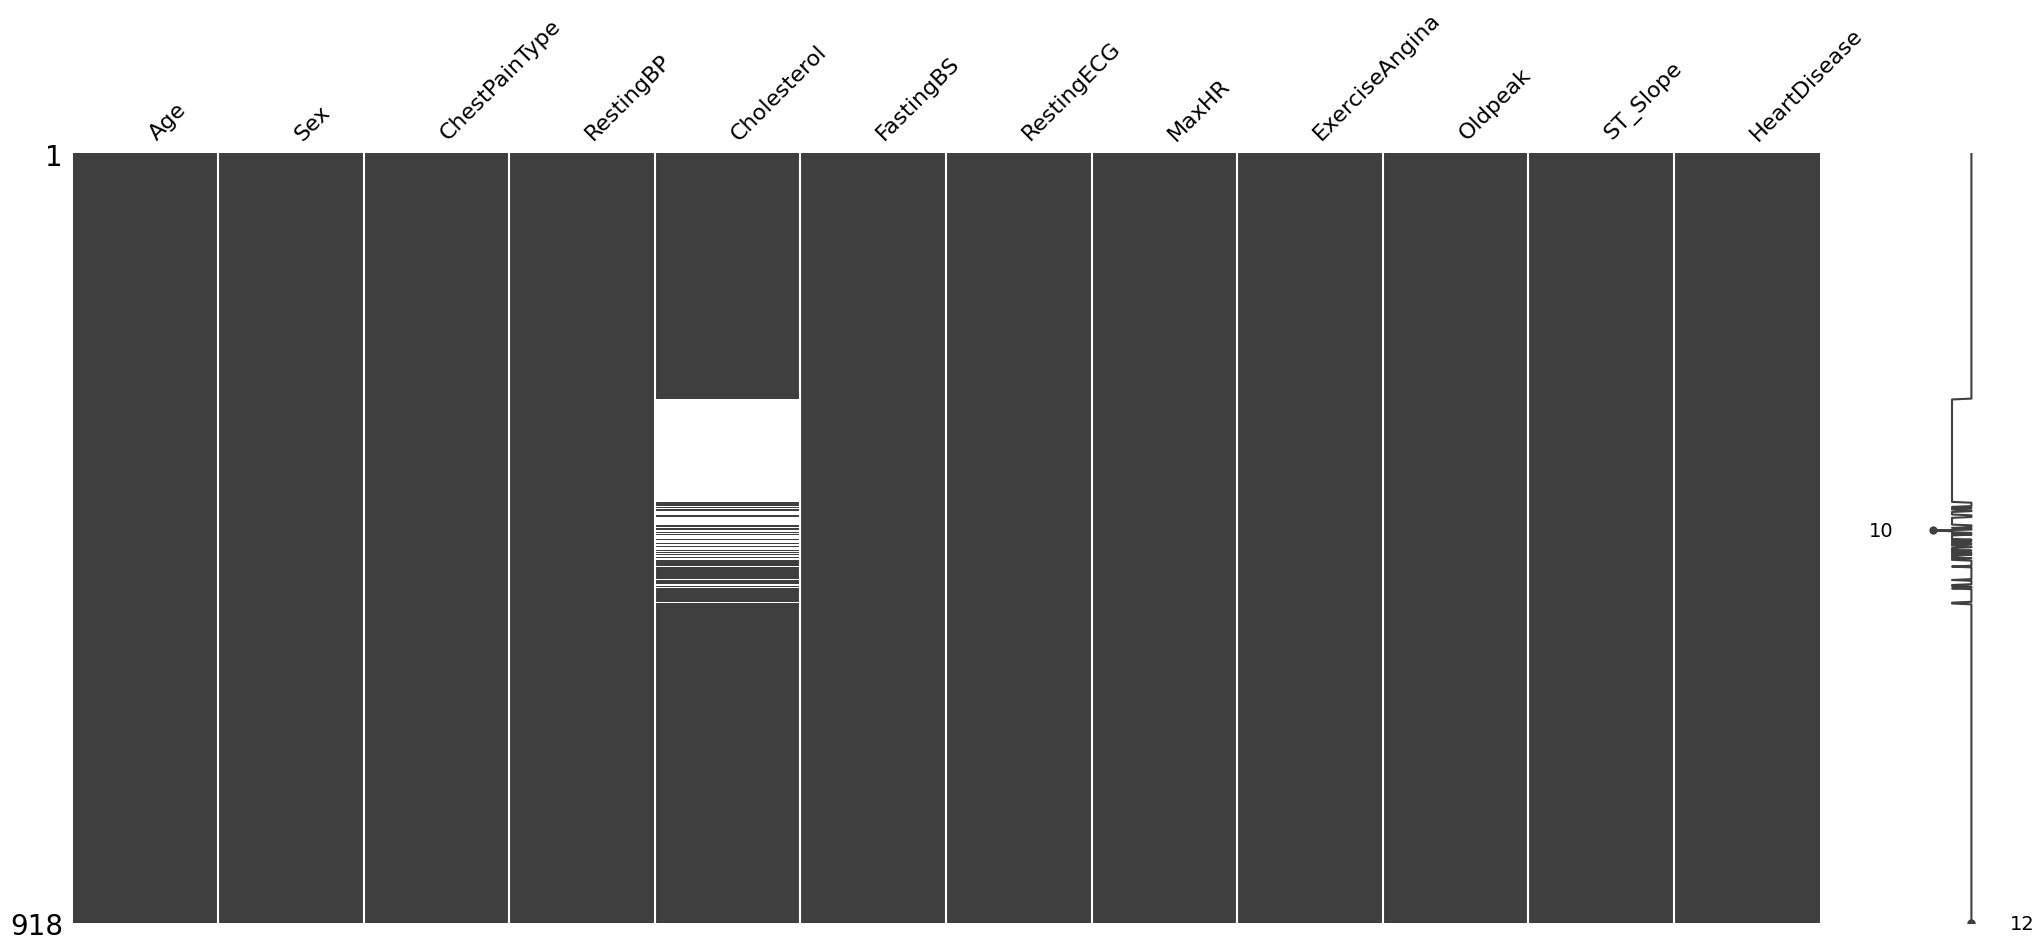

In [ ]:
import missingno as msno
plt.figure(figsize=(12, 8))
msno.matrix(df_heart)
plt.show()

**Histogram of Features**

We plot histograms for selected features in the df_heart dataset to understand the distribution of individual variables.

Each histogram provides the following insights:

*   **Frequency Distribution:** The height of each bar shows how often values fall within a specific range (bin).
*   **Shape of Distribution:** Helps identify whether the data is skewed, uniform, or normally distributed.
*   **Kernel Density Estimate (KDE):** The smooth curve over the histogram represents the probability density, giving a clearer view of the distribution's shape.

By visualizing the distribution of each feature, we can detect potential outliers, skewness, and patterns in the data, which may be useful for preprocessing and modeling.

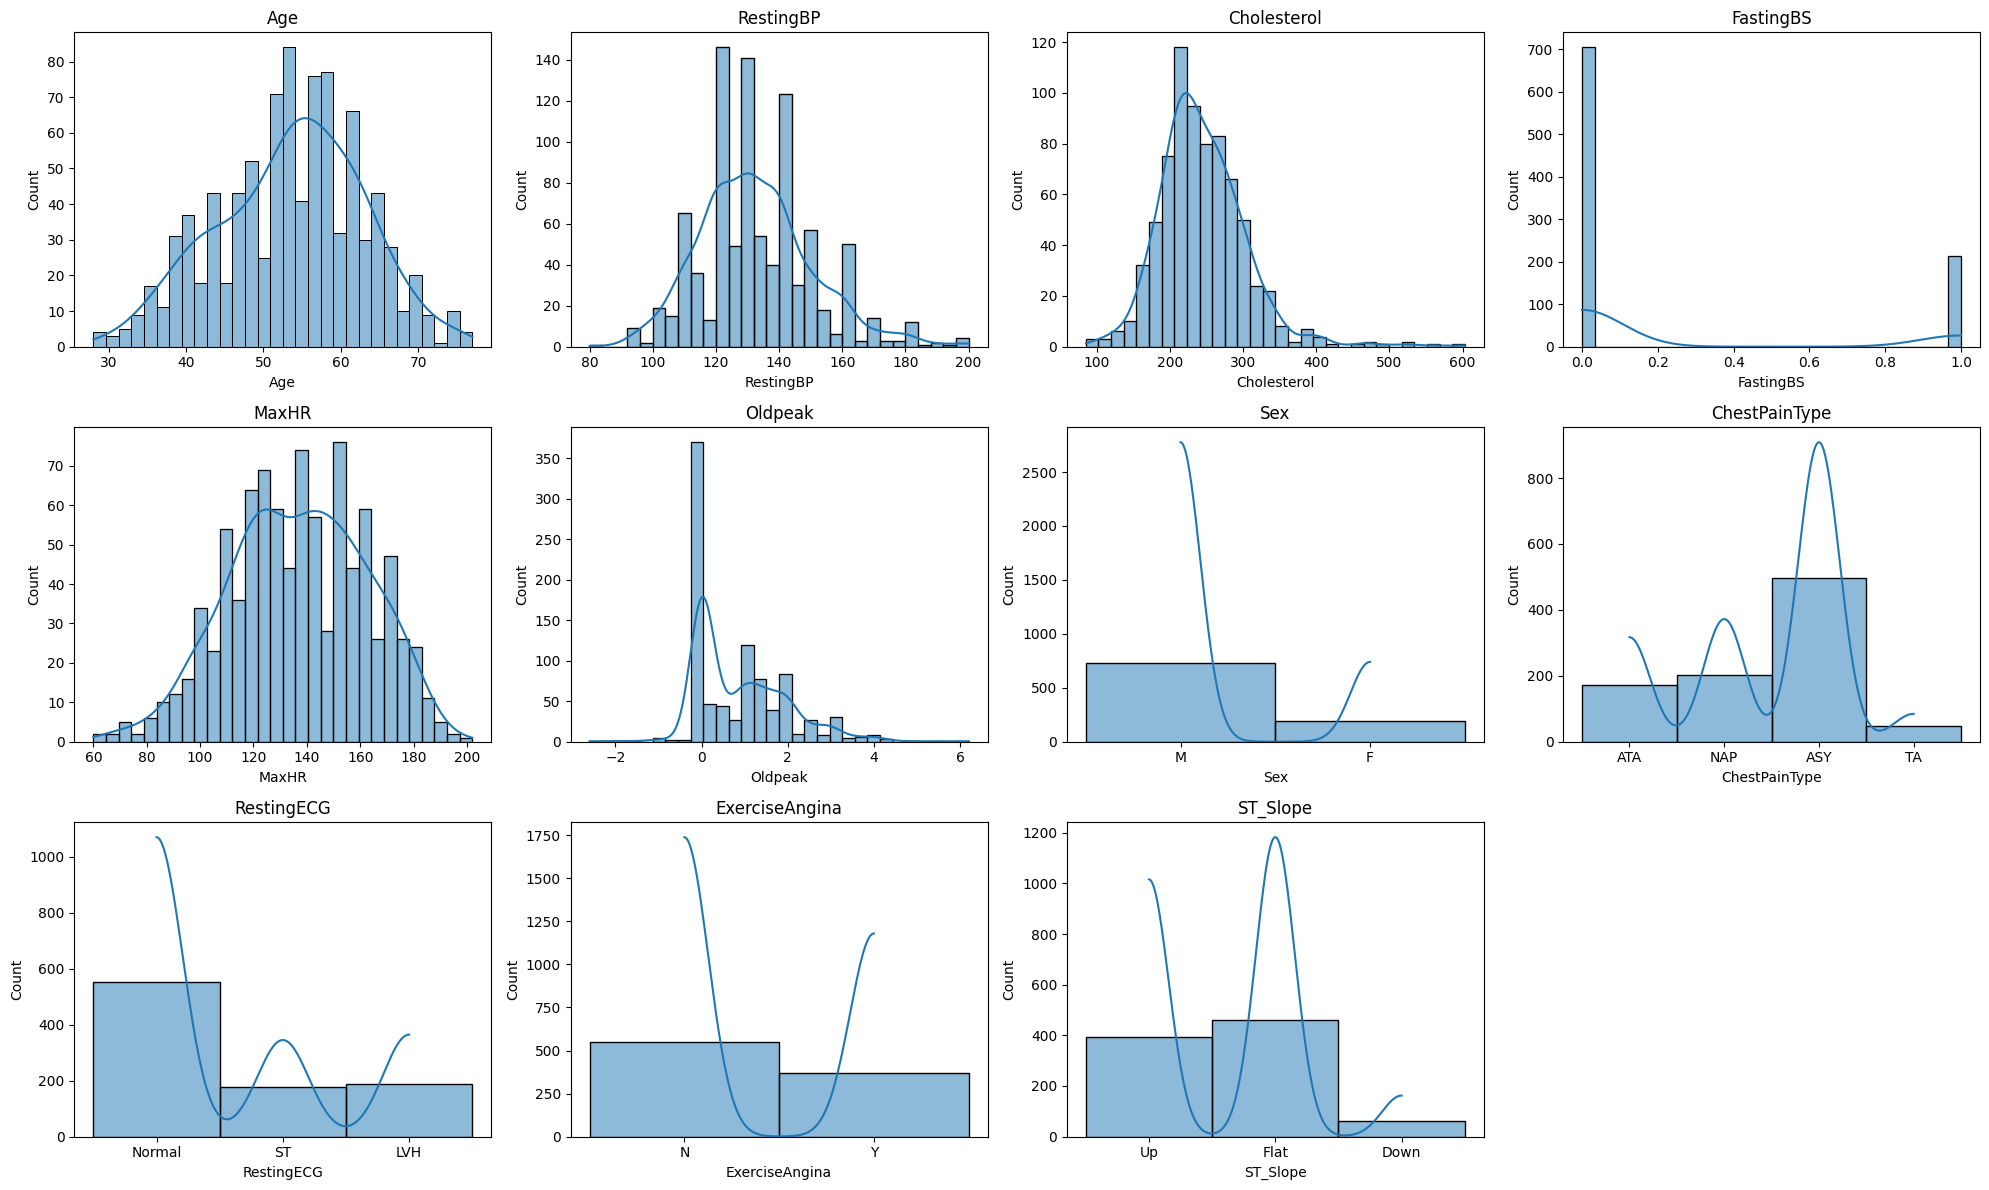

In [ ]:
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
            'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for idx, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df_heart[col], bins=30, kde=True)
    plt.title(f'{col}')
    plt.tight_layout()
plt.show()

**Strip Plot of Continuous Features Grouped by Heart Disease**

We use a strip plot to visualize how the values of continuous features differ between individuals with and without heart disease.

Each dot represents a single individual's value for a specific feature.

The plot shows the spread and overlap of values, grouped by the HeartDisease condition.

This helps highlight which features may differ significantly between the two groups.

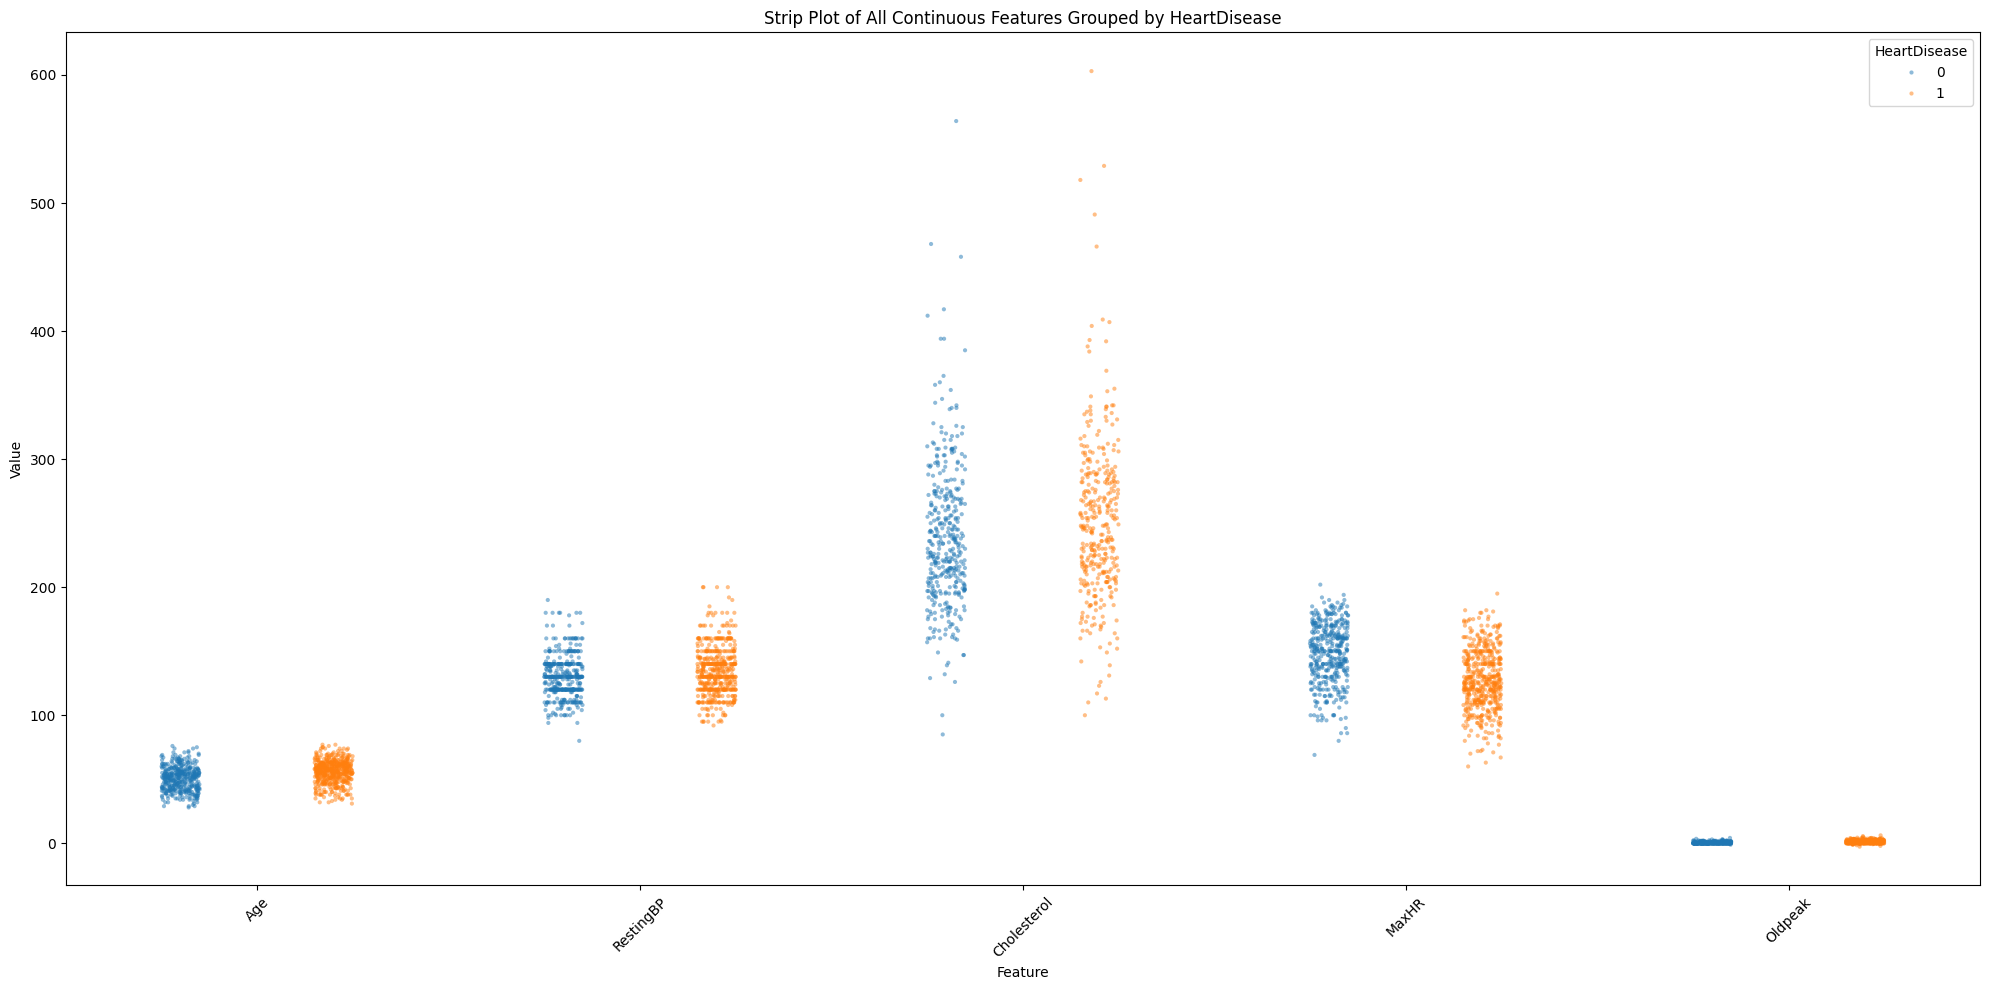

In [ ]:
melted_df = df_heart.melt(id_vars='HeartDisease', value_vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], var_name='Feature', value_name='Value')
plt.figure(figsize=(20, 10))
sns.stripplot(y='Value', x='Feature', hue='HeartDisease', data=melted_df, dodge=True, size=3, alpha=0.5)
plt.title('Strip Plot of All Continuous Features Grouped by HeartDisease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Boxplot of Features**

We generate a boxplot to visually examine the distribution and outliers of the numerical features in the df_heart dataset.

The boxplot displays:

*   The median (central line within the box) for each feature.
*   The interquartile range (IQR) represented by the box (between the 25th and 75th percentiles).
*   Outliers are represented as dots outside the whiskers of the box.
*   The whiskers show the spread of data (the range of values within the IQR).

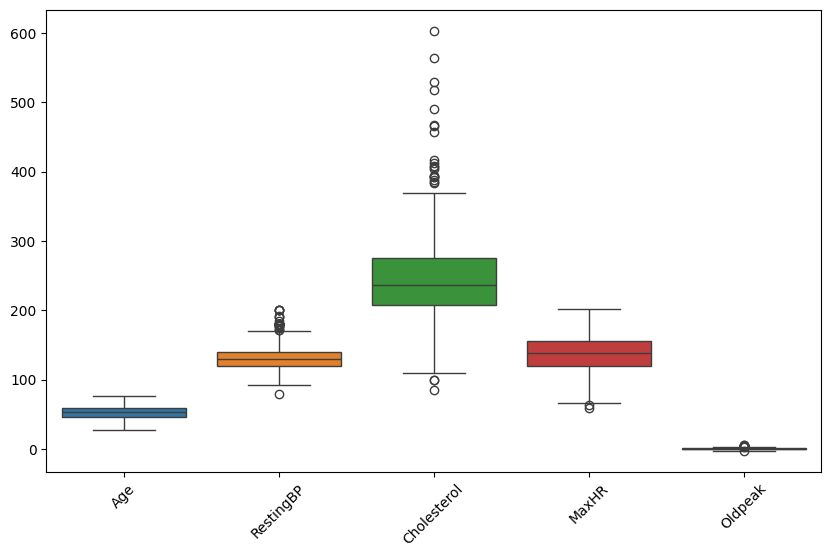

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
plt.xticks(rotation=45)
plt.show()

**Handling Outliers Using IQR (Interquartile Range)**

To deal with outliers, we use the Interquartile Range (IQR) method, which identifies values that fall outside a certain range (1.5 times the IQR above the third quartile and below the first quartile). These outliers can be clipped to the nearest acceptable value to prevent them from skewing the data.

We apply this to the following features: Age, RestingBP, Cholesterol, MaxHR, and Oldpeak.

In [ ]:
features = ['Age',	'RestingBP',	'Cholesterol',	'MaxHR',	'Oldpeak']
for feature in features:
    Q1 = df_heart[feature].quantile(0.25)
    Q3 = df_heart[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_heart[feature] = df_heart[feature].clip(lower, upper)

**Boxplot After Outlier Treatment**

We visualize the distribution of features in the df_heart dataset using a boxplot to check if the outliers have been successfully treated.

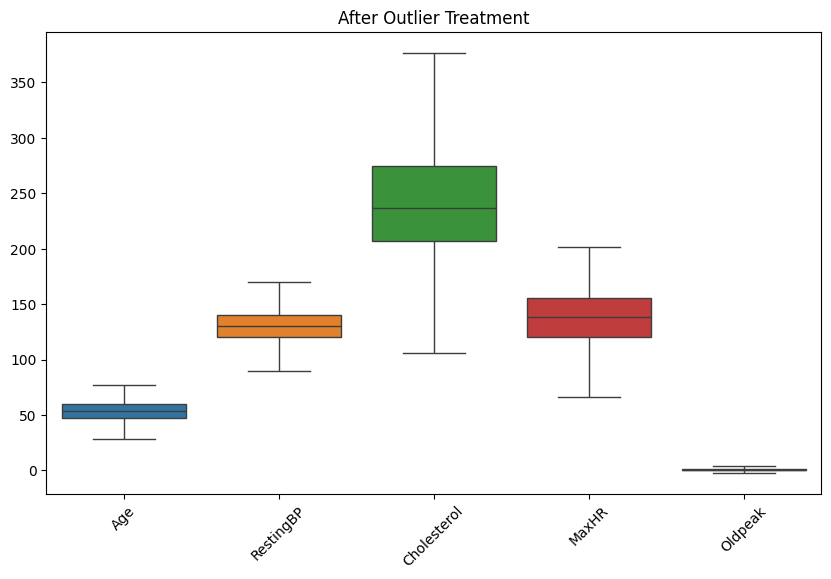

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_heart[['Age',	'RestingBP',	'Cholesterol',	'MaxHR',	'Oldpeak']])
plt.title("After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

**Imputing Missing Values Using KNN (K-Nearest Neighbors)**

To handle the missing values in the dataset, we can use KNN imputation. This technique estimates missing values based on the values of the nearest neighbors (similar instances). In our case, we use 5 nearest neighbors to impute missing values.

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_heart[['RestingBP', 'Cholesterol']] = imputer.fit_transform(df_heart[['RestingBP', 'Cholesterol']])

**Verifying Missing Values After Imputation**

After performing the KNN imputation, it's important to verify that all missing values have been filled. We can do this by checking for any remaining null (missing) values in the dataset.

In [ ]:
df_heart.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


**Data Type Correction After Outlier Handling (Clipping)**

After performing outlier handling (clipping), it's important to ensure the dataset has the correct data types for each feature.

Rounding and Converting Pregnancies and Age to Integer Type: These columns are counts and should remain as integers. Rounding to the nearest integer ensures there are no floating point values.

In [ ]:
df_heart['Age']=df_heart['Age'].round().astype(int)
df_heart['RestingBP']=df_heart['RestingBP'].round().astype(int)
df_heart['Cholesterol']=df_heart['Cholesterol'].round().astype(int)
df_heart['MaxHR']=df_heart['MaxHR'].round().astype(int)

**Descriptive Statistics of the Dataset After Imputation**

After handling missing values and checking for zero values, it's important to examine the summary statistics of the dataset to understand the distribution and range of the features.

In [ ]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.171024,243.788671,0.233115,136.819172,0.877778,0.553377
std,9.432617,16.936218,48.578428,0.423046,25.432057,1.031693,0.497414
min,28.000000,90.000000,106.000000,0.000000,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,213.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,240.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,273.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,377.000000,1.000000,202.000000,3.750000,1.000000


**Checking for Duplicate Entries**

We check for any duplicate rows in the df_heart dataset.

This confirms that there are no duplicate values in the dataset.

In [ ]:
df_heart.duplicated().sum()

np.int64(0)

**Handling Duplicate Entries**

We remove any duplicate rows from the df_heart dataset.

In [ ]:
df_heart.drop_duplicates(inplace=True)
df_heart.duplicated().sum()

np.int64(0)

**Checking the Dataset Shape**

We check the shape of the df_heart dataset to confirm the number of rows and columns after cleaning.

There is no change because there were no missing or duplicate values.

In [ ]:
df_heart.shape

(918, 12)

**Defining Categorical Columns**

In this step, we define the list of categorical columns in the heart disease dataset that need special handling during preprocessing (e.g., one-hot encoding).

In [ ]:
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

**Checking Unique Values for Categorical Columns**

This step involves inspecting the unique values of each categorical column to understand the distinct categories present in the dataset. This is crucial before applying encoding, as it helps confirm how to handle each category during preprocessing.

In [ ]:
for col in categorical_cols:
    print(f"Unique values for {col}: {df_heart[col].unique()}")

Unique values for Sex: ['M' 'F']
Unique values for ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Unique values for FastingBS: [0 1]
Unique values for RestingECG: ['Normal' 'ST' 'LVH']
Unique values for ExerciseAngina: ['N' 'Y']
Unique values for ST_Slope: ['Up' 'Flat' 'Down']


**Stacked Bar Plots of Categorical Features vs Heart Disease**

We use stacked bar charts to visualize how different categorical features relate to the presence or absence of heart disease in the df_heart dataset.

Each plot represents the distribution of a categorical feature across the two categories of the target variable HeartDisease:

*   **No Heart Disease (0)**: The count of instances where the person does not have heart disease.
*   **Heart Disease (1)**: The count of instances where the person has heart disease.

The stacked bars show the counts of each category within the feature (e.g., sex, chest pain type), helping to identify patterns or imbalances between individuals with and without heart disease.

By visualizing these relationships, we can gain insights into potential risk factors or variables that may be linked to heart disease.

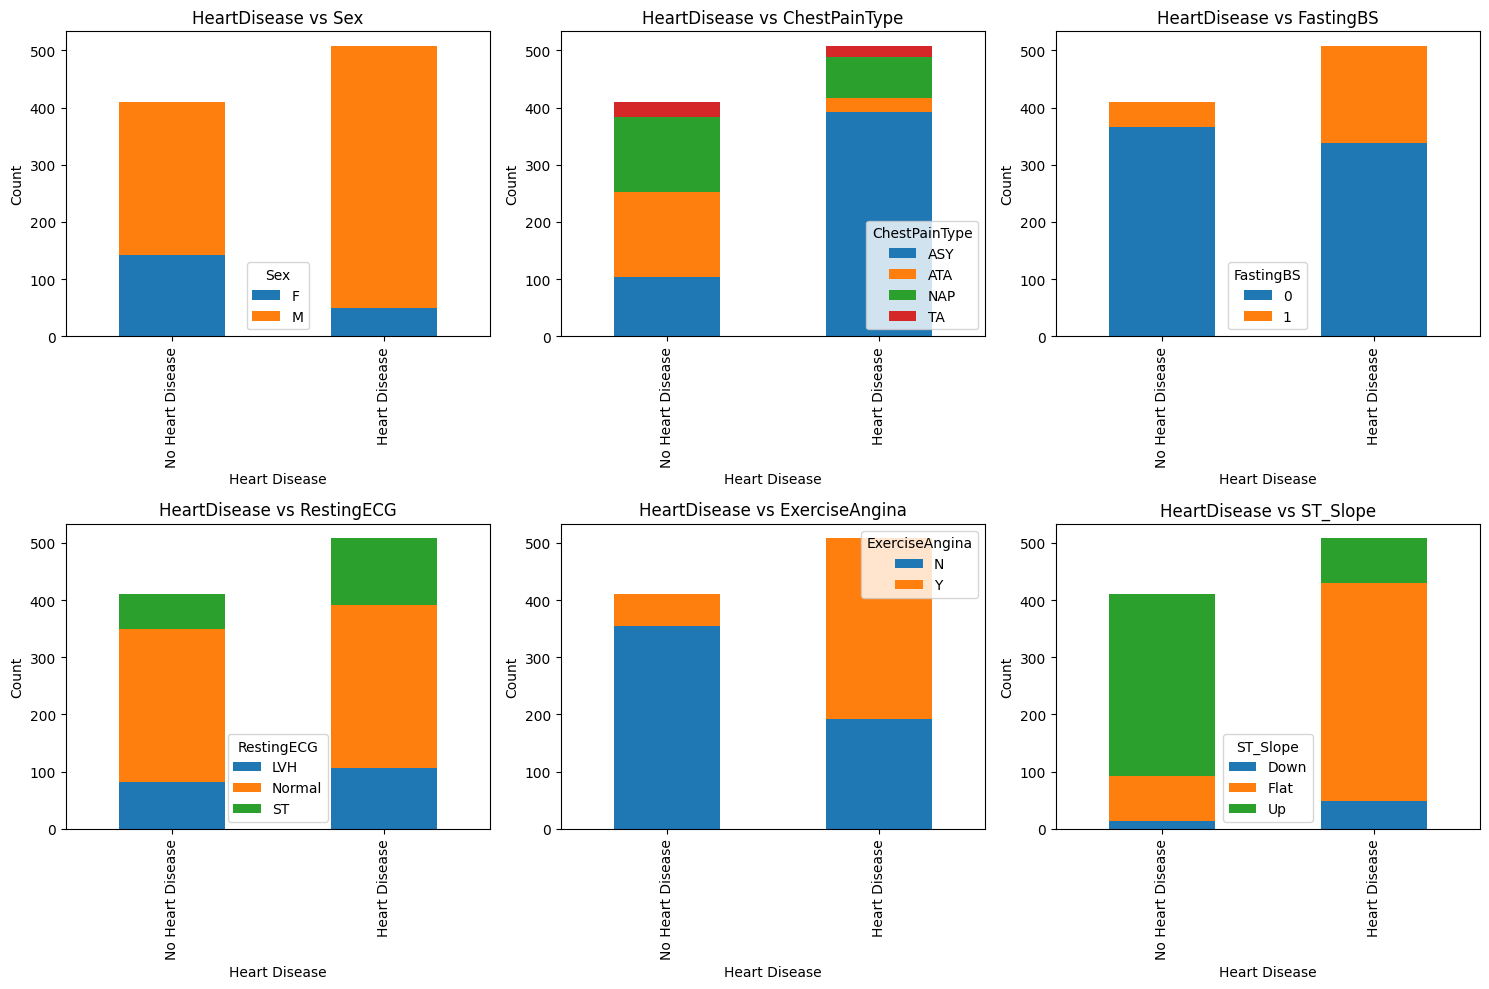

In [ ]:
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    pd.crosstab(df_heart['HeartDisease'], df_heart[col]).plot(kind='bar', stacked=True, ax=ax)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["No Heart Disease", "Heart Disease"])
    ax.set_title(f'HeartDisease vs {col}')
    ax.set_xlabel('Heart Disease')
    ax.set_ylabel('Count')
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

**One-Hot Encoding**

One-hot encoding transforms categorical columns (i.e., columns with non-numeric values) into a format that machine learning algorithms can understand. Each unique category gets converted into a separate column, with binary values (0 or 1) indicating the presence of that category in a given record.

To ensure the target variable remains the last column in the dataset after one-hot encoding, we first separate the target variable, apply the one-hot encoding, and then re-add the target at the end.

Key Points:

*   drop_first=True: This ensures we avoid multicollinearity by removing the first category in each column (also known as the baseline category).
*   astype(int): This converts the newly created binary columns into integers (either 0 or 1), which is suitable for machine learning models.

In [ ]:
target=df_heart['HeartDisease']
df_heart.drop(columns=['HeartDisease'], inplace=True)
df_heart = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=True).astype(int)
df_heart['HeartDisease'] = target

**Checking the Data After One-Hot Encoding**

After performing one-hot encoding on the categorical columns, we inspect the resulting dataset to ensure that the transformation was applied correctly.

In [ ]:
df_heart

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,172,0,1,1,0,0,0,1,0,0,0,1,0
1,49,160,180,156,1,0,0,1,0,0,1,0,0,1,0,1
2,37,130,283,98,0,1,1,0,0,0,0,1,0,0,1,0
3,48,138,214,108,1,0,0,0,0,0,1,0,1,1,0,1
4,54,150,195,122,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,1,0,0,1,0,1,0,0,1,0,1
914,68,144,193,141,3,1,0,0,0,1,1,0,0,1,0,1
915,57,130,131,115,1,1,0,0,0,0,1,0,1,1,0,1
916,57,130,236,174,0,0,1,0,0,0,0,0,0,1,0,1


**Descriptive Statistics of the Dataset (After One-Hot Encoding)**

After applying One-Hot Encoding (OHE) to the categorical features, we once again explore key numerical summaries of each feature in the heart disease dataset to better understand its structure and quality.

In [ ]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
RestingBP,918.0,132.171024,16.936218,90.0,120.0,130.0,140.0,170.0
Cholesterol,918.0,243.788671,48.578428,106.0,213.0,240.0,273.0,377.0
MaxHR,918.0,136.819172,25.432057,66.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.700436,0.927362,-2.0,0.0,0.0,1.0,3.0
Sex_M,918.0,0.789760,0.407701,0.0,1.0,1.0,1.0,1.0
ChestPainType_ATA,918.0,0.188453,0.391287,0.0,0.0,0.0,0.0,1.0
ChestPainType_NAP,918.0,0.221133,0.415236,0.0,0.0,0.0,0.0,1.0
ChestPainType_TA,918.0,0.050109,0.218289,0.0,0.0,0.0,0.0,1.0
FastingBS_1,918.0,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0


**Class Distribution of Heart Disease**

We check how many records belong to each class of the target variable HeartDisease (0 for no heart disease, 1 for heart disease).

The dataset has a moderate class imbalance with:

*   508 instances of class 0 (no heart disease)
*   410 instances of class 1 (heart disease)

In [ ]:
len(df_heart.loc[df_heart['HeartDisease'] == 0])

410

In [ ]:
len(df_heart.loc[df_heart['HeartDisease'] == 1])

508

**Pie Chart of Heart Disease Distribution**

We use a pie chart to visualize the distribution of the target variable HeartDisease in the df_heart dataset.

The pie chart shows the percentage of individuals with and without heart disease:

*   **No Heart Disease**: The percentage of people without heart disease.
*   **Heart Disease**: The percentage of people with heart disease.

This chart provides a clear, visual breakdown of the class distribution in the dataset, helping to understand the balance between the two categories.

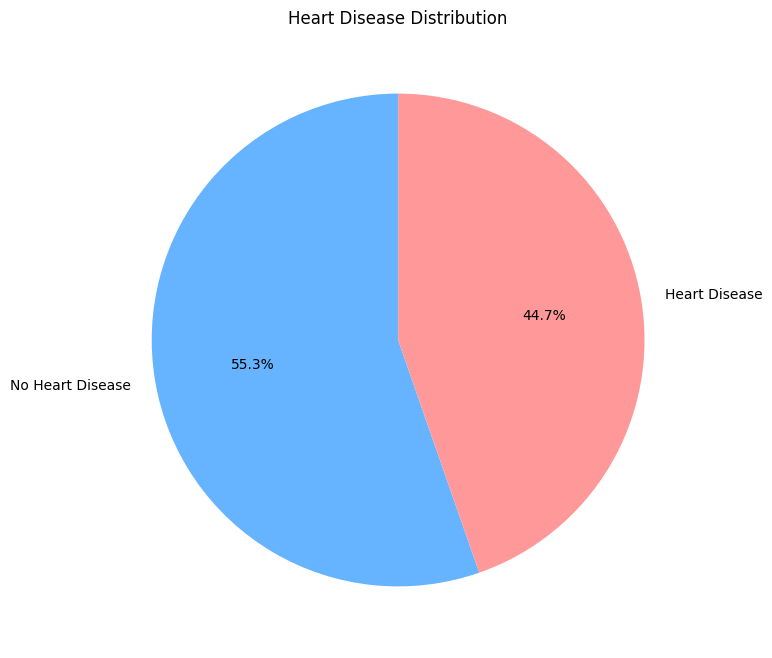

In [ ]:
heart_disease_count = df_heart['HeartDisease'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_count, labels=["No Heart Disease", "Heart Disease"], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Heart Disease Distribution")
plt.show()

**Correlation Matrix of Features**

We calculate the correlation between the numerical features in the df_heart dataset.

This returns a correlation matrix, showing how strongly each pair of features is related (ranging from -1 to 1). A correlation closer to 1 indicates a strong positive relationship, while a correlation closer to -1 indicates a strong negative relationship.

In [ ]:
df_heart.corr()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
Age,1.000000,0.271287,0.069433,-0.382449,0.224835,0.055750,-0.218165,-0.011335,0.032042,0.198039,-0.230566,0.136798,0.215793,0.185568,-0.258067,0.282039
RestingBP,0.271287,1.000000,0.081563,-0.111419,0.163169,0.018006,-0.055882,-0.027248,0.055199,0.064596,-0.113876,0.090758,0.153639,0.114078,-0.106394,0.116001
Cholesterol,0.069433,0.081563,1.000000,-0.032735,0.047878,-0.097612,-0.014139,-0.080396,-0.048466,0.044798,-0.045106,-0.016706,0.099735,0.090562,-0.082679,0.111488
MaxHR,-0.382449,-0.111419,-0.032735,1.000000,-0.172271,-0.189197,0.253832,0.134524,0.100048,-0.131797,0.024142,-0.158244,-0.370892,-0.342834,0.383747,-0.400519
Oldpeak,0.224835,0.163169,0.047878,-0.172271,1.000000,0.118787,-0.240950,-0.119476,0.009589,0.050331,-0.087951,0.060414,0.412273,0.300404,-0.450237,0.402317
Sex_M,0.055750,0.018006,-0.097612,-0.189197,0.118787,1.000000,-0.161522,-0.066486,-0.004031,0.120076,-0.010634,0.063715,0.190664,0.116077,-0.150942,0.305445
ChestPainType_ATA,-0.218165,-0.055882,-0.014139,0.253832,-0.240950,-0.161522,1.000000,-0.256767,-0.110679,-0.140514,0.107941,-0.046111,-0.300365,-0.304667,0.357588,-0.401924
ChestPainType_NAP,-0.011335,-0.027248,-0.080396,0.134524,-0.119476,-0.066486,-0.256767,1.000000,-0.122381,-0.039249,0.005010,-0.042236,-0.166030,-0.072031,0.093583,-0.212964
ChestPainType_TA,0.032042,0.055199,-0.048466,0.100048,0.009589,-0.004031,-0.110679,-0.122381,1.000000,0.026885,-0.057719,-0.011611,-0.128105,-0.010486,0.002087,-0.054790
FastingBS_1,0.198039,0.064596,0.044798,-0.131797,0.050331,0.120076,-0.140514,-0.039249,0.026885,1.000000,-0.093028,0.127110,0.060451,0.107006,-0.161730,0.267291


**Correlation Heatmap of Features**

We visualize the correlation matrix using a heatmap to better understand the relationships between the features.

The heatmap provides a visual representation of the correlation values, with a color gradient indicating the strength of the correlation:

*   Cooler colors represent negative correlations.
*   Warmer colors represent positive correlations.

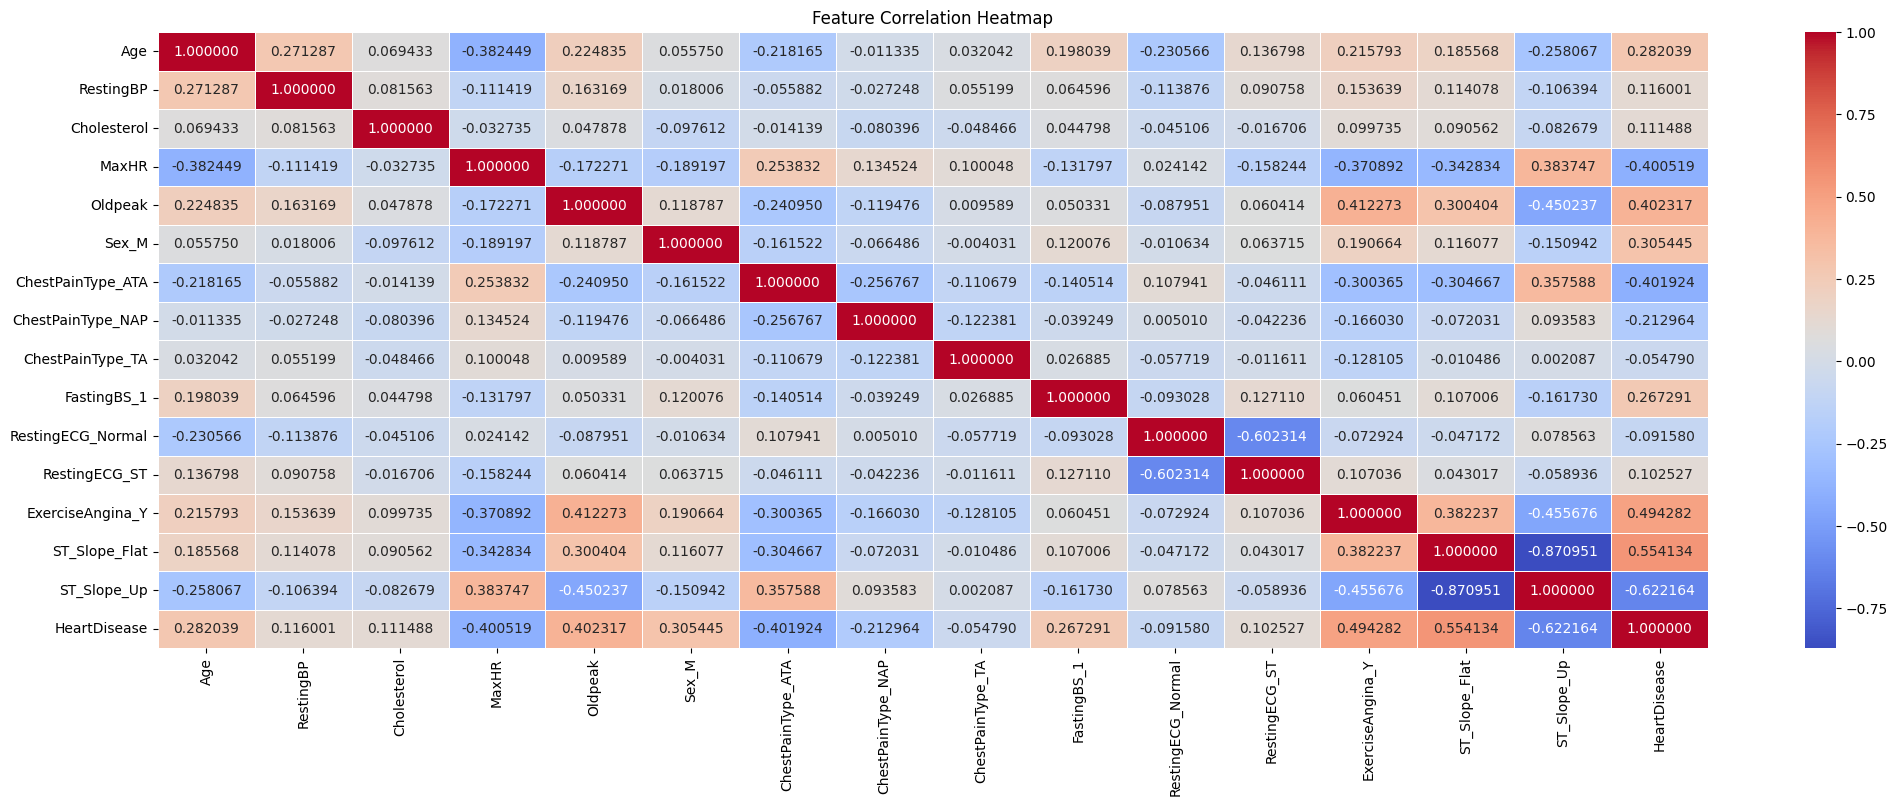

In [ ]:
plt.figure(figsize=(25, 8))
sns.heatmap(df_heart.corr(), annot=True, cmap="coolwarm", fmt=".6f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Checking for Multicollinearity using VIF**

Multicollinearity occurs when two or more independent variables in a dataset are highly correlated. This can negatively impact the interpretability and performance of certain models. To detect multicollinearity, we calculate the Variance Inflation Factor (VIF) for each feature.

VIF Range	Interpretation:



*   `1	No multicollinearity`
*   `1–5	Moderate correlation (acceptable)`
*   `>5	High correlation (consider action)`
*   `>10	Very high (strong multicollinearity)`

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = df_heart[df_heart.columns[:-1]]
X = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

              Feature         VIF
0               const  216.591998
1                 Age    1.397221
2           RestingBP    1.121440
3         Cholesterol    1.049580
4               MaxHR    1.518908
5             Oldpeak    1.464353
6               Sex_M    1.098892
7   ChestPainType_ATA    1.487237
8   ChestPainType_NAP    1.273772
9    ChestPainType_TA    1.124890
10        FastingBS_1    1.096636
11  RestingECG_Normal    1.709996
12      RestingECG_ST    1.669539
13   ExerciseAngina_Y    1.581791
14      ST_Slope_Flat    4.423178
15        ST_Slope_Up    5.377019


**Correlation of Features with the Target (HeartDisease)**

We examine the correlation of each feature with the target variable HeartDisease by sorting the values in descending order.

This shows which features have the strongest and weakest correlations with the target variable HeartDisease.

Key Observations:

*   Highly Correlated with the Target (HeartDisease):
    *   ST_Slope_Up (-0.62)
    *   ST_Slope_Flat (0.55)
    *   ExerciseAngina_Y (0.49)
    *   Oldpeak (0.40)
    *   ChestPainType_ATA (-0.40)
    *   MaxHR (-0.40)

*   Moderately Correlated with the Target (HeartDisease):
    *   Sex_M (0.30)
    *   Age (0.28)
    *   FastingBS_1 (0.26)
    *   ChestPainType_NAP (-0.21)

*   Weak or No Correlation with the Target (HeartDisease):
    *   RestingBP (0.11)
    *   Cholesterol (0.11)
    *   RestingECG_ST (0.10)
    *   RestingECG_Normal (-0.09)
    *   ChestPainType_TA (-0.05)

In [ ]:
df_heart.corr()["HeartDisease"].sort_values(ascending=False)

,HeartDisease
HeartDisease,1.000000
ST_Slope_Flat,0.554134
ExerciseAngina_Y,0.494282
Oldpeak,0.402317
Sex_M,0.305445
Age,0.282039
FastingBS_1,0.267291
RestingBP,0.116001
Cholesterol,0.111488
RestingECG_ST,0.102527


**Hexbin Plots of Continuous Feature Pairs**

We use hexbin plots to visualize the relationships between pairs of continuous features in the df_heart dataset.

Each plot displays:

*   **Hexagonal Bins**: The color intensity within each hexagon represents the density of data points falling within that area.
*   **Color Gradient**: The magma colormap is used to represent density, progressing from dark purples (low density) to bright yellows (high density), creating a visually striking gradient that highlights dense clusters.

These hexbin plots allow us to explore the relationships between two continuous features at a time, helping to identify patterns, clusters, and potential correlations between them.

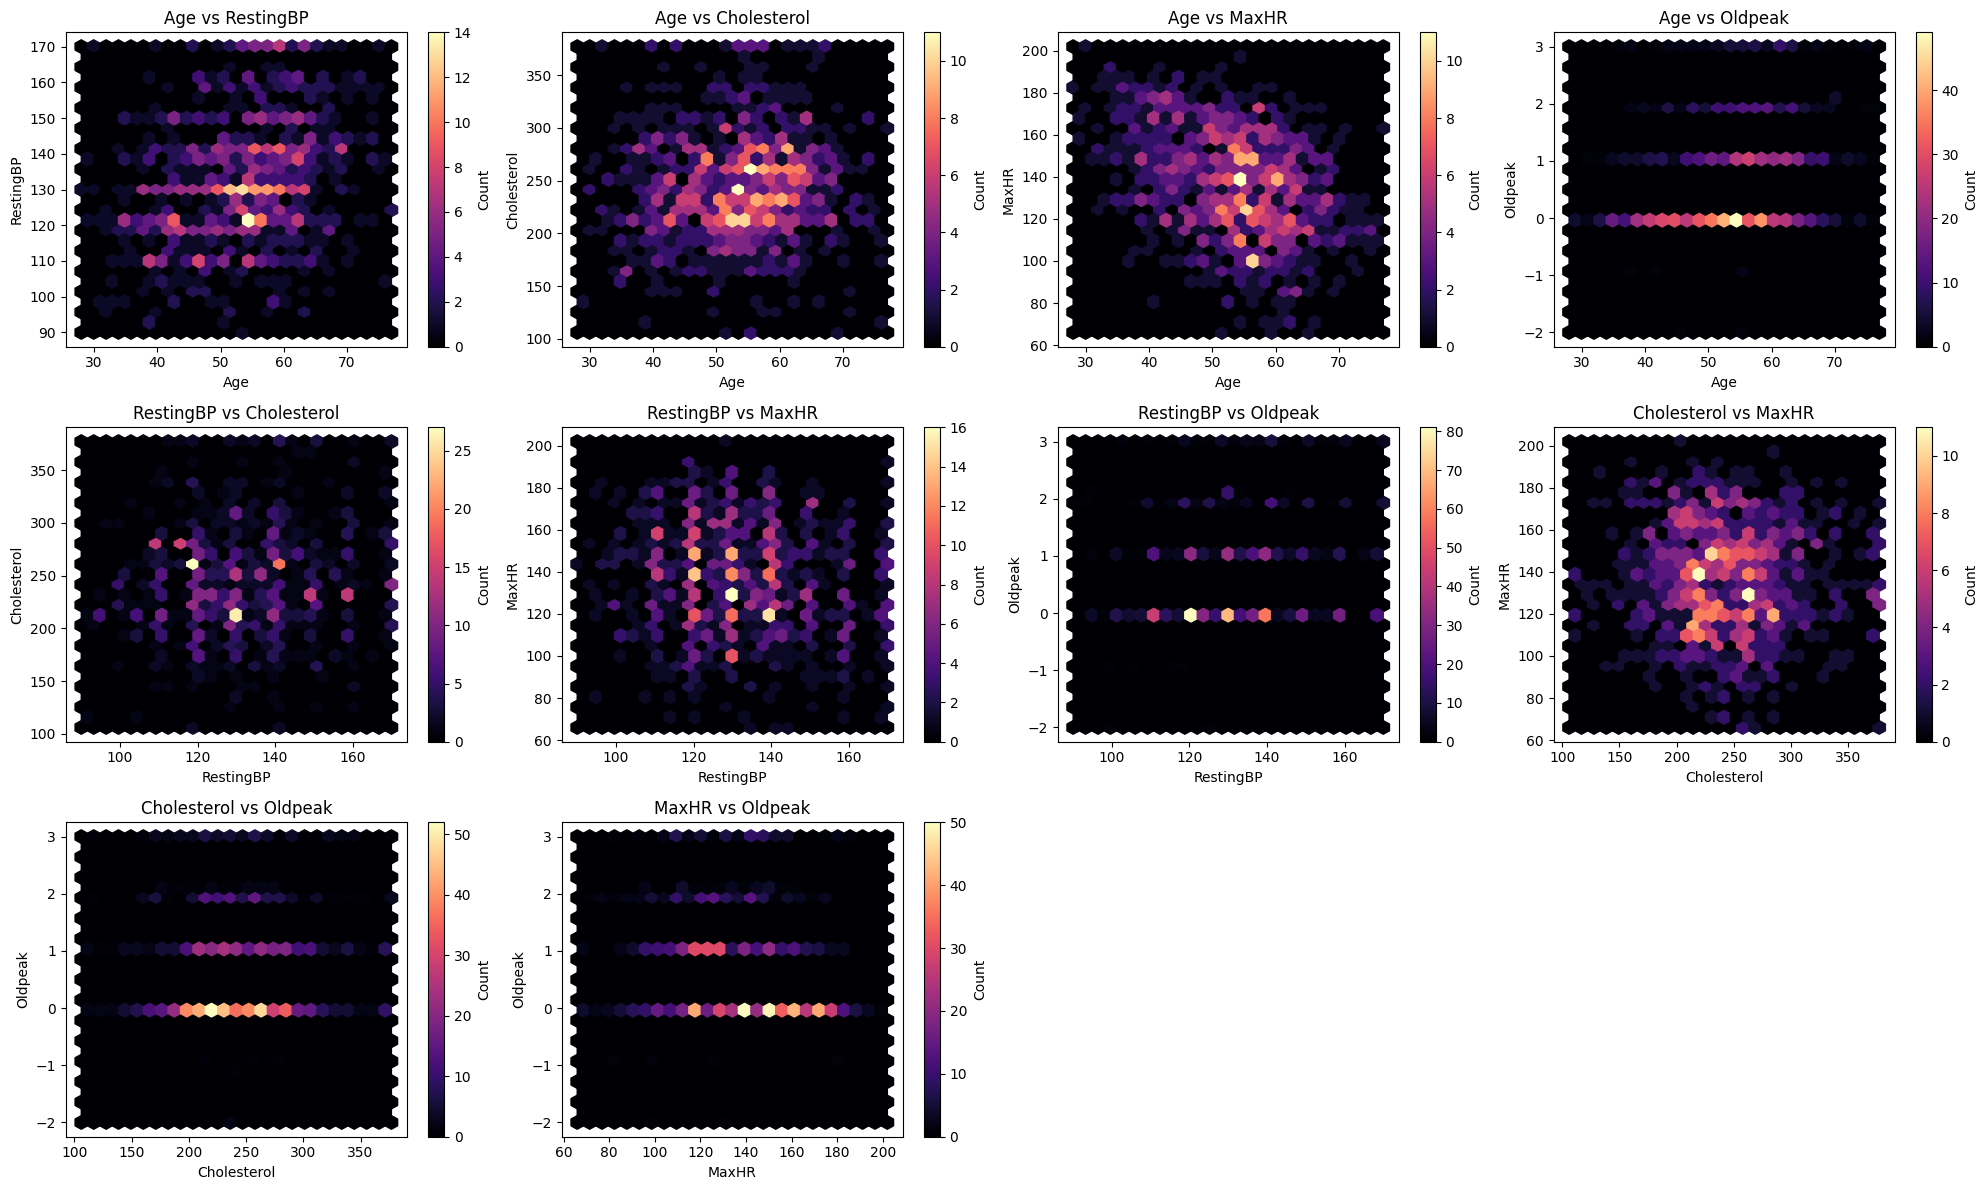

In [ ]:
import itertools
import matplotlib.pyplot as plt
continuous_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
pairs = list(itertools.combinations(continuous_cols, 2))
n_cols = 4
n_rows = -(-len(pairs) // n_cols)
plt.figure(figsize=(n_cols*5, n_rows*4))
for i, (x, y) in enumerate(pairs):
    plt.subplot(n_rows, n_cols, i+1)
    # Create hexbin plot
    hb = plt.hexbin(df_heart[x], df_heart[y], gridsize=25, cmap='magma')
    # Add colorbar
    plt.colorbar(hb, ax=plt.gca(), label='Count')
    # Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
plt.show()

**Histogram of Features**

We plot histograms for selected features in the df_heart dataset to understand the distribution of individual variables.

Each histogram provides the following insights:

*   **Frequency Distribution:** The height of each bar shows how often values fall within a specific range (bin).
*   **Shape of Distribution:** Helps identify whether the data is skewed, uniform, or normally distributed.
*   **Kernel Density Estimate (KDE):** The smooth curve over the histogram represents the probability density, giving a clearer view of the distribution's shape.

By visualizing the distribution of each feature, we can detect potential outliers, skewness, and patterns in the data, which may be useful for preprocessing and modeling.

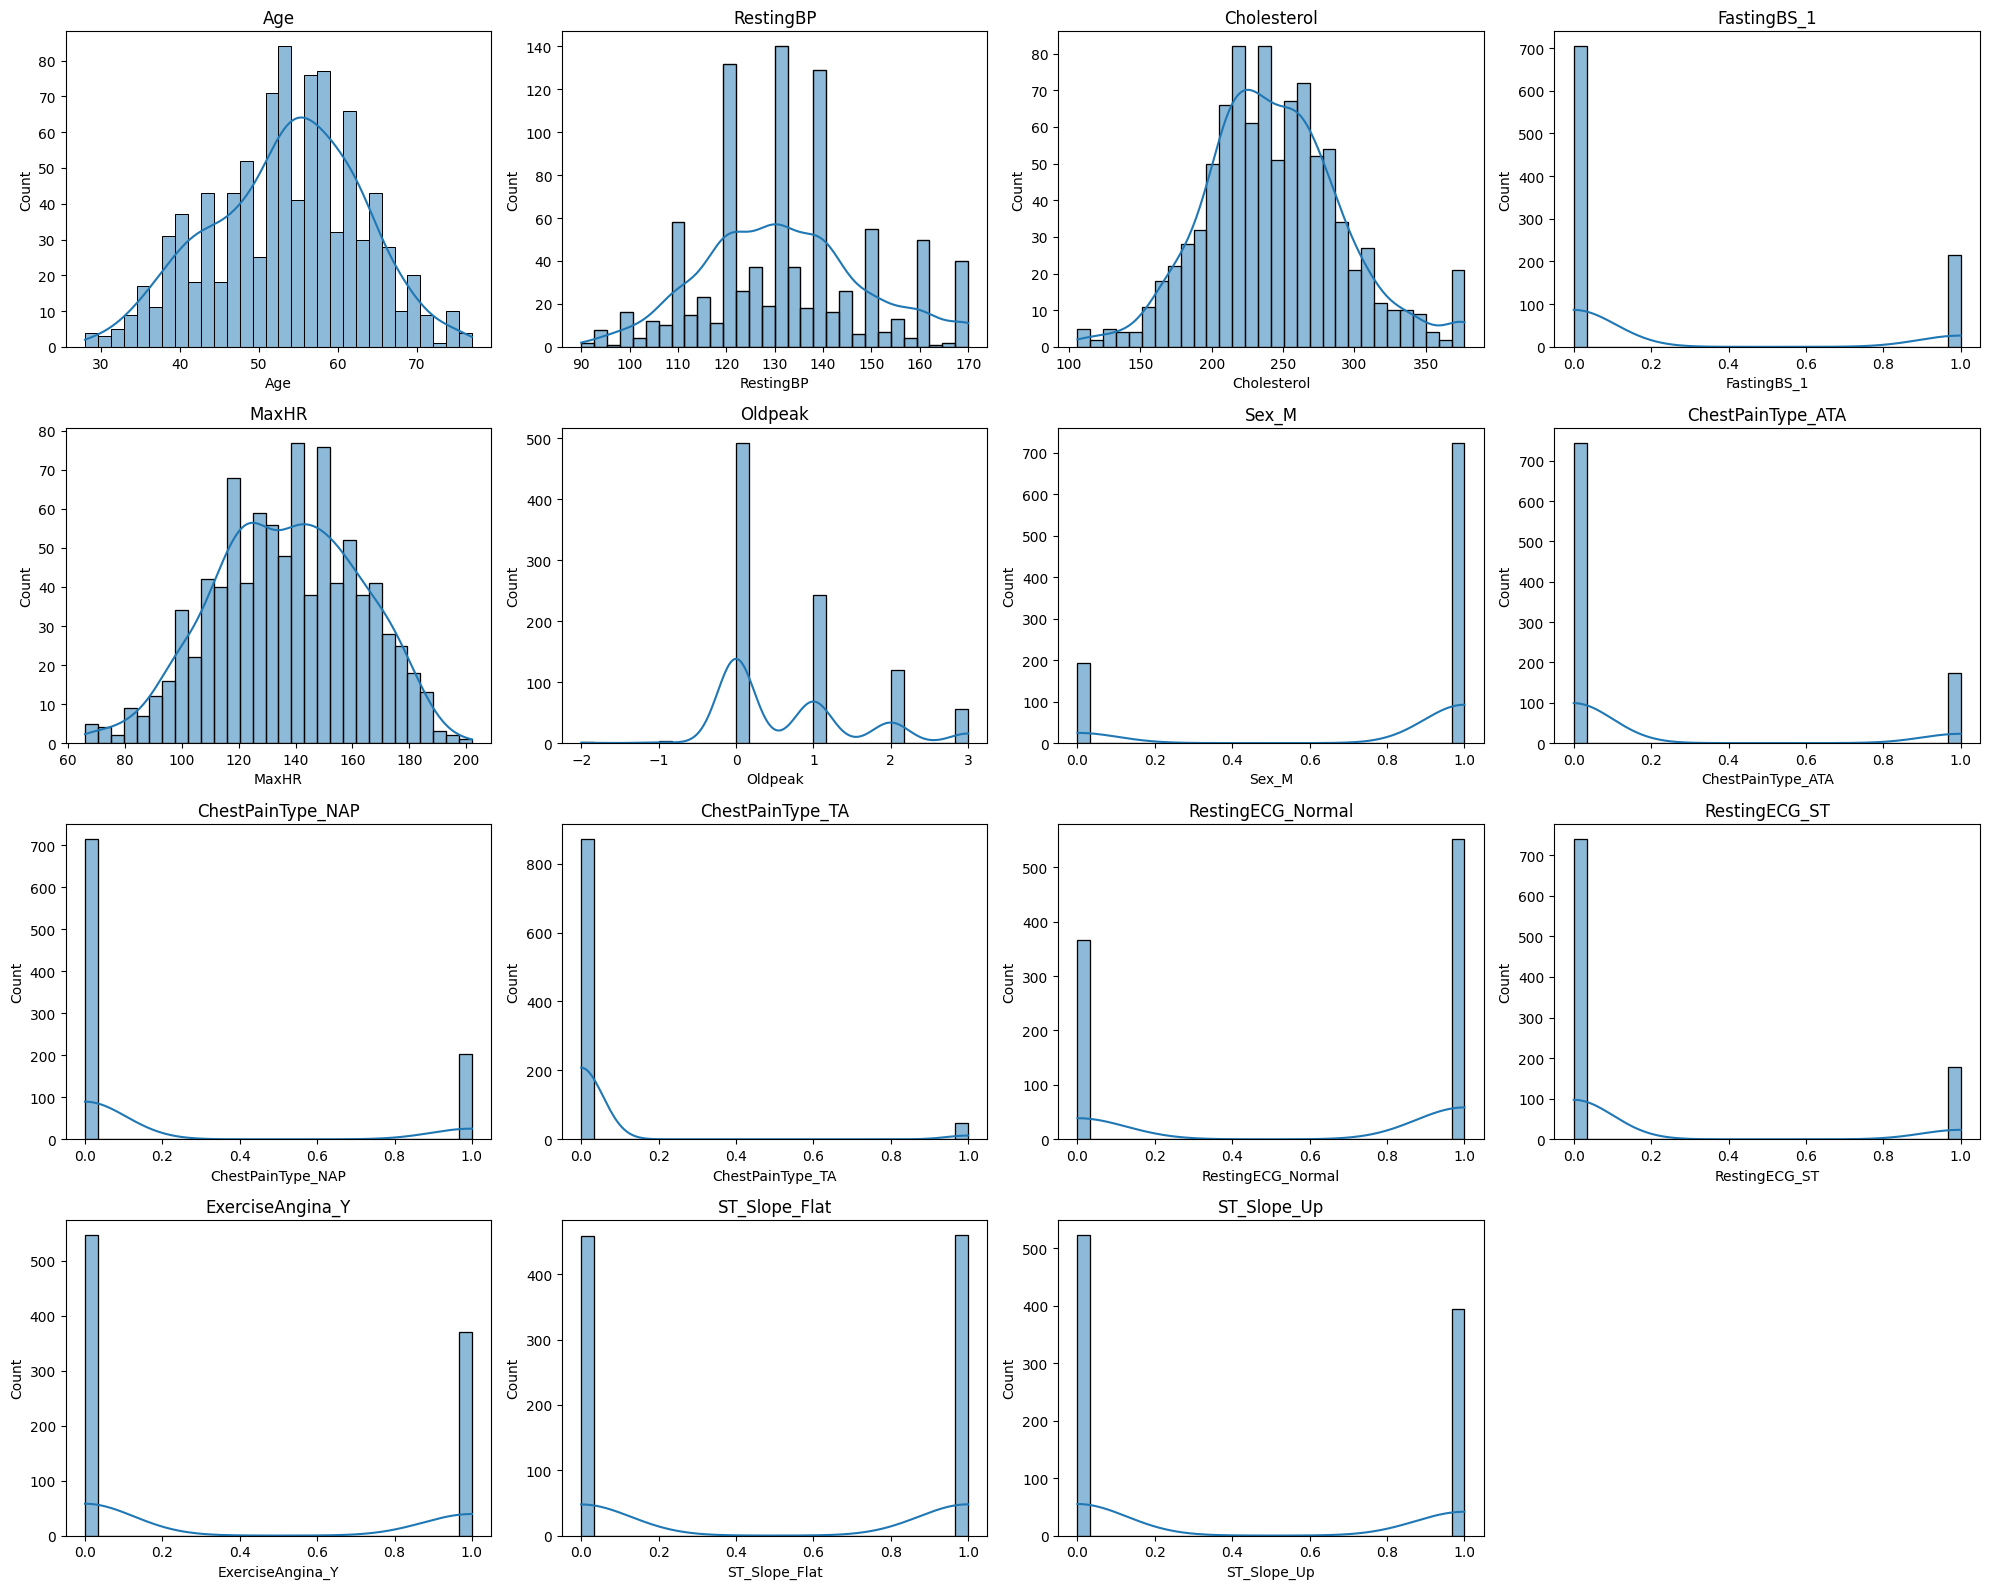

In [ ]:
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS_1', 'MaxHR', 'Oldpeak', 'Sex_M', 'ChestPainType_ATA',
            'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
            'ST_Slope_Flat', 'ST_Slope_Up']
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for idx, col in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df_heart[col], bins=30, kde=True)
    plt.title(f'{col}')
    plt.tight_layout()
plt.show()

**Strip Plot of Continuous Features Grouped by Heart Disease**

We use a strip plot to visualize how the values of continuous features differ between individuals with and without heart disease.

Each dot represents a single individual's value for a specific feature.

The plot shows the spread and overlap of values, grouped by the HeartDisease condition.

This helps highlight which features may differ significantly between the two groups.

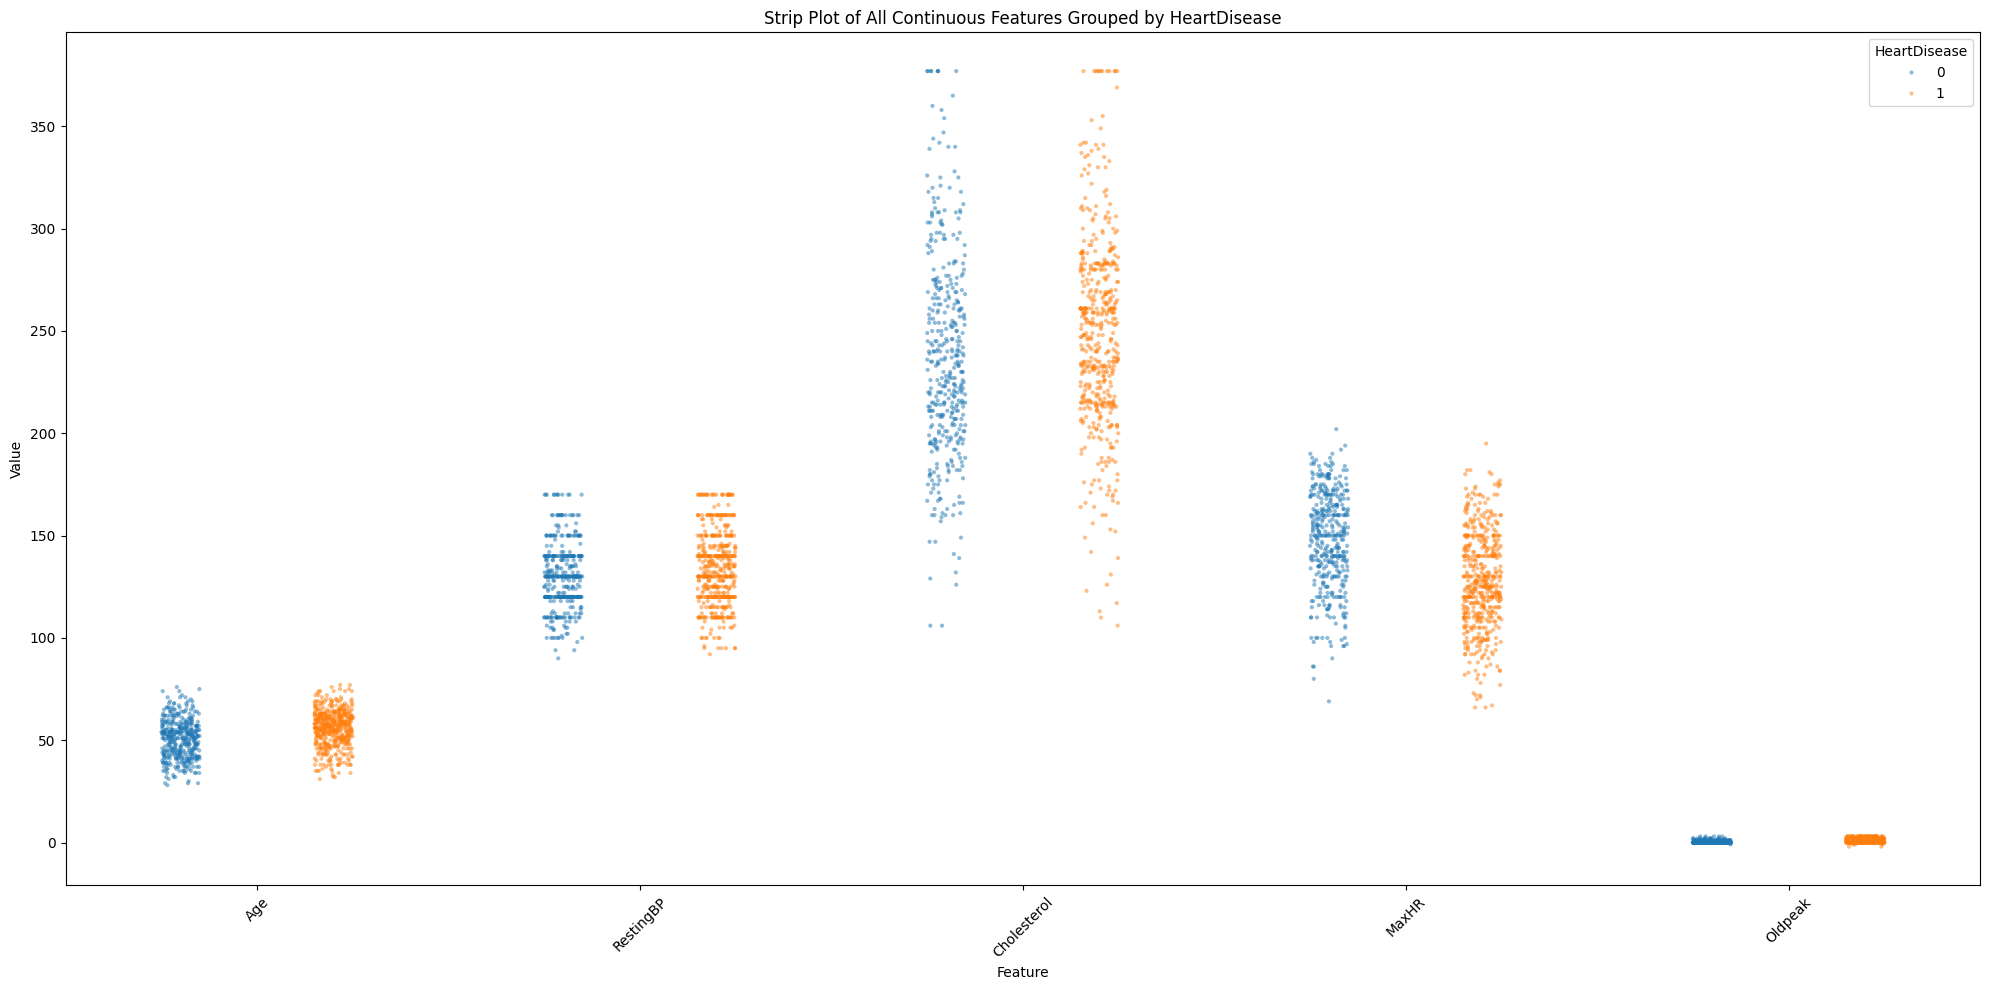

In [ ]:
melted_df = df_heart.melt(id_vars='HeartDisease', value_vars=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], var_name='Feature', value_name='Value')
plt.figure(figsize=(20, 10))
sns.stripplot(y='Value', x='Feature', hue='HeartDisease', data=melted_df, dodge=True, size=3, alpha=0.5)
plt.title('Strip Plot of All Continuous Features Grouped by HeartDisease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Splitting the Dataset — Train & Test Sets**

To evaluate our models properly, we split the dataset into training and testing sets using an 80-20 ratio, while maintaining the original class distribution with stratify=y.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (734, 15)
y_train shape: (734,)
X_test shape: (184, 15)
y_test shape: (184,)


**X_train Before Standardization**

We examine the training set features prior to scaling to understand their original distribution and range.

In [ ]:
X_train

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
485,63,139,217,128,1,1,1,0,0,1,0,1,1,1,0
486,55,110,214,180,0,1,1,0,0,1,0,1,0,0,1
117,59,130,338,130,1,0,0,0,0,1,0,1,1,1,0
361,47,160,235,124,0,1,0,0,0,0,1,0,1,1,0
296,50,145,269,139,0,1,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,51,135,160,150,2,1,0,1,0,0,1,0,0,1,0
201,46,120,230,150,0,1,0,1,0,0,1,0,0,0,1
462,59,122,233,117,1,1,0,0,0,0,1,0,1,0,0
252,61,125,292,115,0,1,0,0,0,0,0,1,1,0,1


**X_test Before Standardization**

We examine the test set features prior to scaling to understand their original distribution and range.

In [ ]:
X_test

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
356,46,115,283,113,1,1,0,0,0,0,1,0,1,1,0
763,58,132,224,173,3,1,0,1,0,0,0,0,0,0,1
817,60,125,258,141,2,1,0,0,0,0,0,0,1,1,0
735,49,120,188,139,2,1,0,1,0,0,1,0,0,1,0
892,39,138,220,152,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,45,140,224,122,0,1,1,0,0,1,1,0,0,0,1
752,56,125,249,144,1,1,0,0,0,1,0,0,1,1,0
492,49,130,215,145,3,1,0,0,1,0,0,1,0,1,0
622,59,110,239,142,1,1,0,0,0,0,0,0,1,1,0


**Feature Scaling using StandardScaler**

To bring all features onto the same scale, we apply Standard Scaling (mean = 0, standard deviation = 1). This is especially important for algorithms sensitive to feature magnitude, such as Logistic Regression, SVM, and KNN.

*   fit_transform() is applied on X_train to compute the mean and standard deviation, and then scale the data.
*   transform() is applied on X_test using the same statistics to avoid data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (734, 15)
y_train shape: (734,)
X_test shape: (184, 15)
y_test shape: (184,)


**X_train After Scaling**

We examine the scaled training features to ensure that all features have been standardized and have a mean of 0 and a standard deviation of 1.

In [ ]:
X_train

array([[ 0.9700116 ,  0.38364562, -0.57847709, ...,  1.20277457,
         0.98110491, -0.86224587],
       [ 0.12202766, -1.32192678, -0.63986832, ..., -0.83141099,
        -1.01925899,  1.15976201],
       [ 0.54601963, -0.14566995,  1.8976357 , ...,  1.20277457,
         0.98110491, -0.86224587],
       ...,
       [ 0.54601963, -0.61617268, -0.25105722, ...,  1.20277457,
        -1.01925899, -0.86224587],
       [ 0.75801561, -0.43973416,  0.95630356, ...,  1.20277457,
        -1.01925899,  1.15976201],
       [-0.93795226,  0.44245846, -0.4352309 , ..., -0.83141099,
        -1.01925899,  1.15976201]])

**X_test After Scaling**

We examine the scaled test features to ensure that all features have been standardized and have a mean of 0 and a standard deviation of 1.

In [ ]:
X_test

array([[-0.83195427, -1.02786257,  0.77212989, ...,  1.20277457,
         0.98110491, -0.86224587],
       [ 0.44002164, -0.02804427, -0.4352309 , ..., -0.83141099,
        -1.01925899,  1.15976201],
       [ 0.65201762, -0.43973416,  0.26053633, ...,  1.20277457,
         0.98110491, -0.86224587],
       ...,
       [-0.51396029, -0.14566995, -0.61940457, ..., -0.83141099,
         0.98110491, -0.86224587],
       [ 0.54601963, -1.32192678, -0.12827476, ...,  1.20277457,
         0.98110491, -0.86224587],
       [ 0.33402364, -1.61599099, -0.66033206, ..., -0.83141099,
         0.98110491, -0.86224587]])

**Model Setup and Initializations**

In this section, we initialize a variety of machine learning models that will be used for the heart disease prediction task. These models include decision trees, ensemble methods, and boosting classifiers to leverage different techniques and improve model performance.

*   **Decision Tree Classifier:**
    *   A tree-based model that splits the data into subsets based on feature values.
    *   Random state is set to 42 for reproducibility.
    *   Handles both categorical and continuous features.
    *   Pros: Simple, interpretable, and easy to understand.
    *   Cons: Prone to overfitting when the tree is too deep or complex.
*   **Random Forest Classifier:**
    *   An ensemble of decision trees that uses bootstrapped samples and averages predictions to improve accuracy and reduce overfitting.
    *   Random state is set to 42 for reproducibility.
    *   Ideal for handling a mix of categorical and continuous features.
    *   Pros: Robust, handles missing values well, and reduces overfitting by averaging multiple models.
    *   Cons: Less interpretable compared to a single decision tree.
*   **Extra Trees Classifier:**
    *  An ensemble method that builds multiple decision trees but splits nodes randomly, which can lead to faster training times and potentially better generalization.
    *  Random state is set to 42 for reproducibility.
    *  Pros: Faster training, reduced overfitting, and better generalization on large datasets.
    *  Cons: Can be less interpretable and slower on smaller datasets compared to Random Forest.
*   **AdaBoost Classifier:**
    *  A boosting ensemble method that builds weak learners (typically decision trees) sequentially, each one focusing on the errors made by the previous models.
    *  The final model is a weighted sum of all the weak learners.
    *  Random state is set to 42 for reproducibility.
    *  Pros: Can improve the performance of weak models and performs well on imbalanced datasets.
    *  Cons: Sensitive to noisy data and outliers; can overfit with too many iterations.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

**Model Evaluation Function**

We define a utility function to train and evaluate multiple classification models using a consistent set of performance metrics.

Metrics Used:

    *   Accuracy: Overall correctness of the model.
    *   Precision: How many predicted positives are actual positives.
    *   Recall: How many actual positives were correctly predicted.
    *   F1 Score: Harmonic mean of precision and recall.
    *   Confusion Matrix: Breakdown of true positives, true negatives, false positives, and false negatives.
    *   ROC AUC Score: Measures the model’s ability to distinguish between classes using predicted probabilities
        (only for models that support predict_proba).

This function trains each model on the training set and reports its performance on the test set. It's ideal for comparing multiple classifiers in a consistent, organized way.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
performance={}
def evaluate_models(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        print(f"\nModel: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        print(f" Accuracy:  {acc:.4f}")
        print(f" Precision: {prec:.4f}")
        print(f" Recall:    {rec:.4f}")
        print(f" F1 Score:  {f1:.4f}")
        print(f" Confusion Matrix:\n{cm}")
        if hasattr(model, "predict_proba"):
          y_proba = model.predict_proba(X_test)[:, 1]
          roc = roc_auc_score(y_test, y_proba)
        print(f" ROC AUC:   {roc:.4f}")
        performance[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1, "ROC AUC": roc, "Confusion Matrix": cm}
        print("-" * 50)

**Model Evaluation Results**

Here are some key takeaways from the evaluation of the models:

*   **Decision Tree:**
    *   While the simplest and most interpretable model, Decision Tree showed the lowest performance, particularly in ROC AUC. However, it still serves well as a fast, explainable baseline.
*   **Random Forest:**
    *   Random Forest delivered the highest ROC AUC, showing the strongest class discrimination ability. It maintains a solid balance of precision and recall, making it highly reliable overall.
*   **Extra Trees:**
    *   With the highest recall and robust AUC, Extra Trees performed extremely well. It excels at detecting most true positive cases, making it a great option for high-sensitivity requirements.
*   **AdaBoost:**
    *   AdaBoost delivered the highest precision, meaning it's very effective at minimizing false positives. It’s a strong candidate when it's critical to avoid incorrectly diagnosing someone with heart disease.

In [ ]:
evaluate_models(models, X_train, X_test, y_train, y_test)


Model: DecisionTree
 Accuracy:  0.7826
 Precision: 0.8370
 Recall:    0.7549
 F1 Score:  0.7938
 Confusion Matrix:
[[67 15]
 [25 77]]
 ROC AUC:   0.7860
--------------------------------------------------

Model: RandomForest
 Accuracy:  0.8587
 Precision: 0.8878
 Recall:    0.8529
 F1 Score:  0.8700
 Confusion Matrix:
[[71 11]
 [15 87]]
 ROC AUC:   0.9257
--------------------------------------------------

Model: ExtraTrees
 Accuracy:  0.8696
 Precision: 0.8545
 Recall:    0.9216
 F1 Score:  0.8868
 Confusion Matrix:
[[66 16]
 [ 8 94]]
 ROC AUC:   0.9272
--------------------------------------------------

Model: AdaBoost
 Accuracy:  0.8750
 Precision: 0.8990
 Recall:    0.8725
 F1 Score:  0.8856
 Confusion Matrix:
[[72 10]
 [13 89]]
 ROC AUC:   0.9156
--------------------------------------------------


**Performance Metrics Visualization**

This visualization compares the performance of multiple classification models on the heart disease dataset. The goal is to evaluate how well each model identifies the presence or absence of heart disease based on various performance metrics and their confusion matrix results.

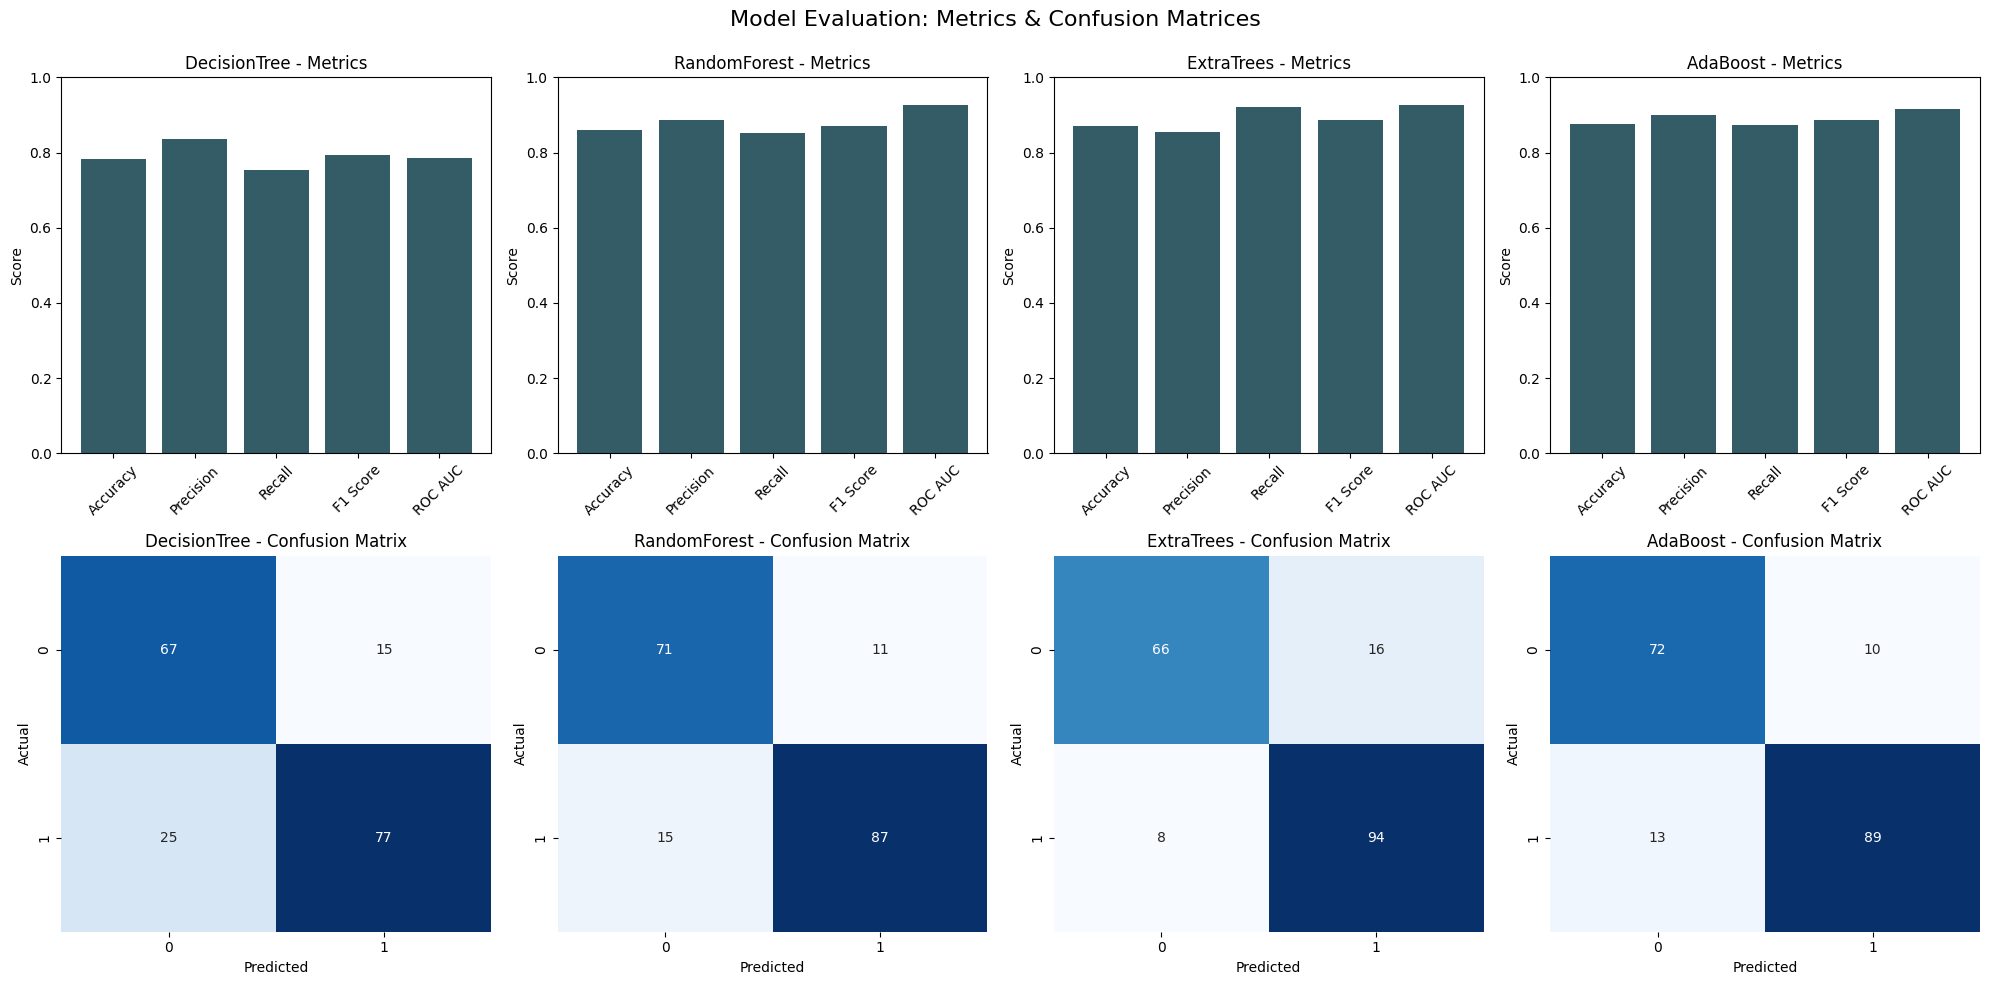

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
metrics_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
models_list = list(performance.keys())
fig, axs = plt.subplots(2, len(models_list), figsize=(5 * len(models_list), 10))
if len(models_list) == 1:
    axs = np.expand_dims(axs, axis=1)  # handle single-model case
for i, model in enumerate(models_list):
    # Extract the metric values directly from the performance dictionary
    metric_values = [performance[model][metric] for metric in metrics_list]
    # Plot bar chart of all metrics for this model
    axs[0, i].bar(metrics_list, metric_values, color='#335c67')
    axs[0, i].set_ylim(0, 1)
    axs[0, i].set_title(f'{model} - Metrics')
    axs[0, i].set_ylabel('Score')
    axs[0, i].tick_params(axis='x', rotation=45)
    # Plot confusion matrix
    cm = performance[model]["Confusion Matrix"]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[1, i], cbar=False)
    axs[1, i].set_title(f'{model} - Confusion Matrix')
    axs[1, i].set_xlabel('Predicted')
    axs[1, i].set_ylabel('Actual')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Model Evaluation: Metrics & Confusion Matrices', fontsize=16)
plt.show()

**Plotting ROC Curves for Model Evaluation**

To evaluate the performance of our models, we can use Receiver Operating Characteristic (ROC) curves. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) for different threshold values of a classifier. The area under the curve (AUC) quantifies the overall ability of the model to discriminate between the positive and negative classes, with a higher AUC indicating better performance.

We plot the ROC curve for each model and calculate its AUC score to compare their classification performance in detecting heart disease.

Insights & Model Comparison:

*   Best Performers:
    *  Random Forest achieved the highest AUC score of 0.93, indicating excellent capability in distinguishing between patients with and without heart disease. Its ensemble structure of multiple decision trees provides both high accuracy and strong generalization, making it highly reliable for medical data analysis.

*   Strong Contenders:
    *   With an AUC score of 0.92, Extra Trees displayed strong classification performance. Its randomized tree splits contribute to reduced overfitting and faster computation, making it nearly as effective as Random Forest for this task.
    *   AdaBoost also recorded an impressive AUC of 0.92, closely matching Extra Trees. It particularly excelled in precision, which means fewer false positives — a crucial factor in medical diagnostics where over-alerting can lead to unnecessary anxiety or procedures.

*   Least Effective:
    *   Decision Tree had the lowest AUC score at 0.79, reflecting more limited ability to differentiate between classes. While it's interpretable and easy to implement, its performance suggests it may be best used as a baseline or when model transparency is prioritized over predictive power.

Ensemble models — Random Forest (0.93), Extra Trees (0.92), and AdaBoost (0.92) — significantly outperformed the standalone Decision Tree (0.79). These results highlight the strength of ensemble techniques in improving classification accuracy and robustness, especially in critical applications like heart disease prediction.

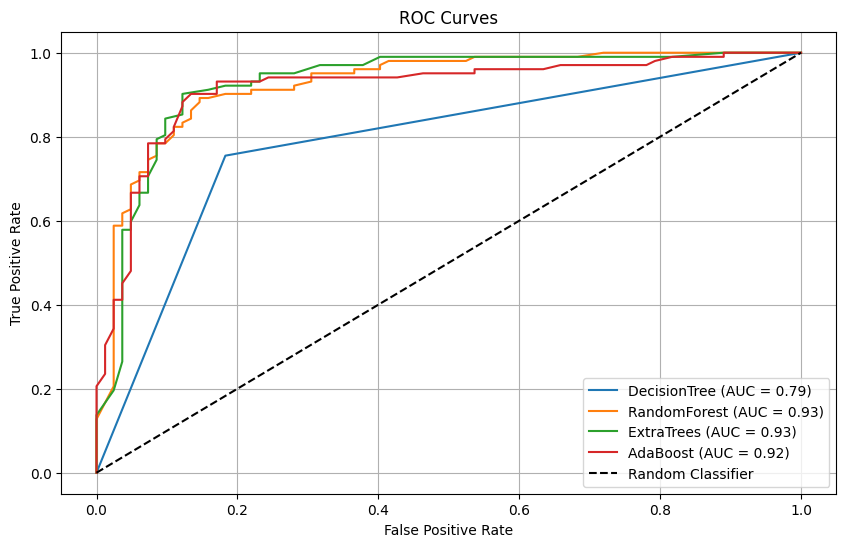

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.grid(True)
    plt.show()
plot_roc_curves(models, X_test, y_test)

**Feature Importance Visualization**

Tree-based models inherently provide insights into which features most strongly influence their decisions. Using feature importance plots, we can visualize and compare the relative contribution of each input feature across different models.
We plot the ROC curve for each model and calculate its AUC score to compare their performance.

In tree-based models, feature importance quantifies how useful or valuable each feature was in constructing the trees. Higher values mean that the feature played a more significant role in splitting data and improving model accuracy.

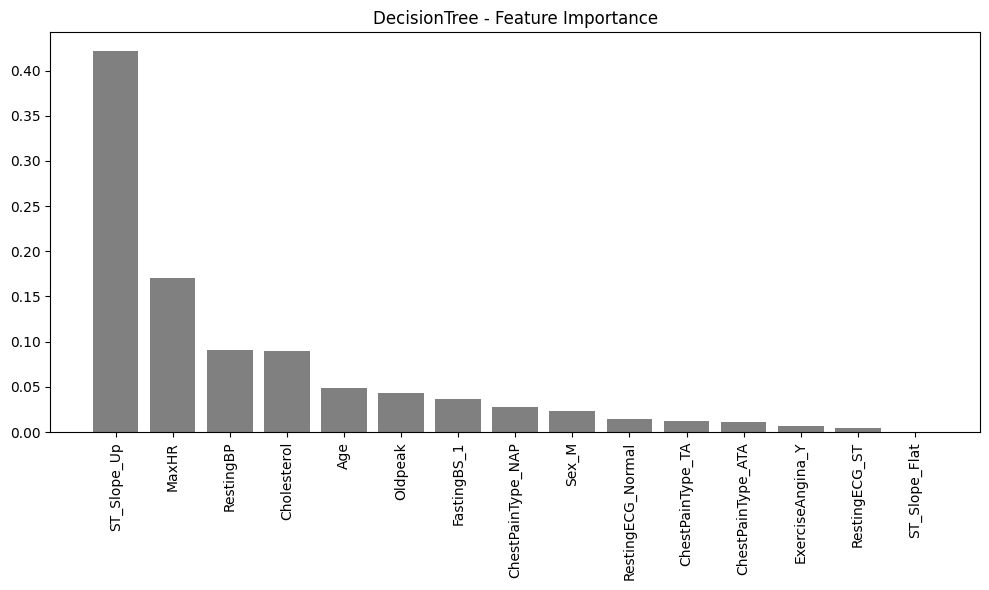

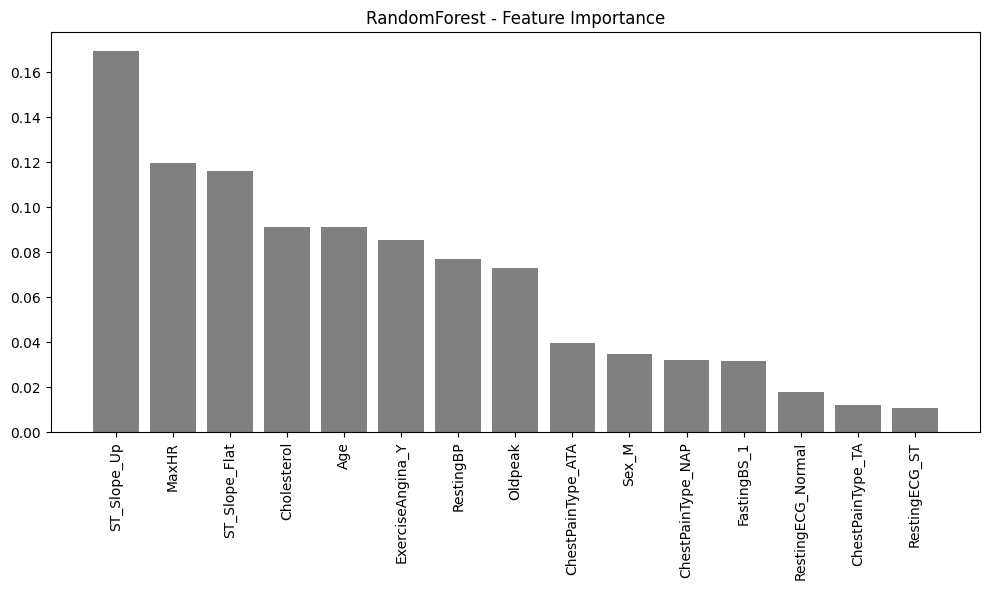

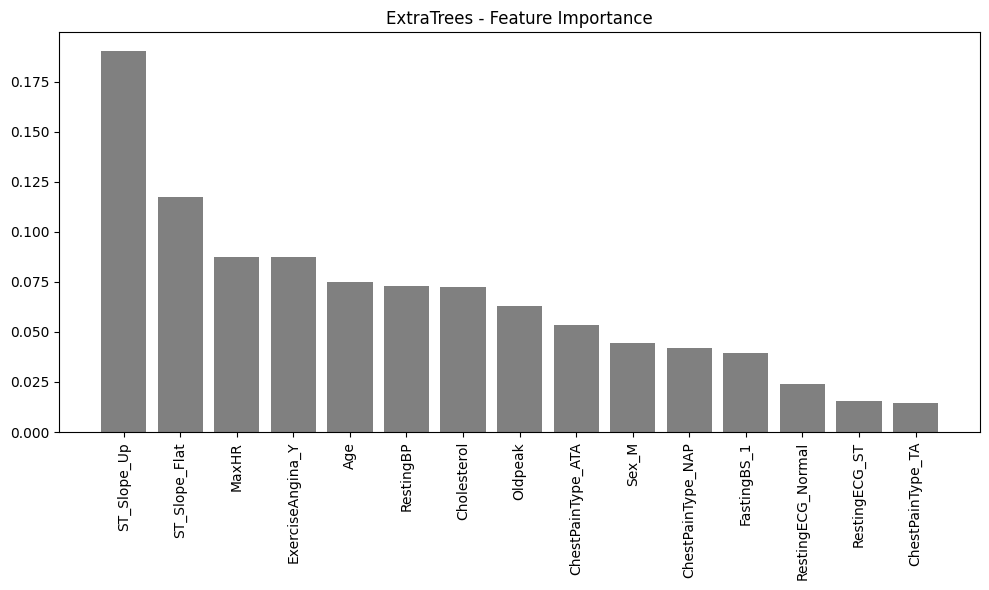

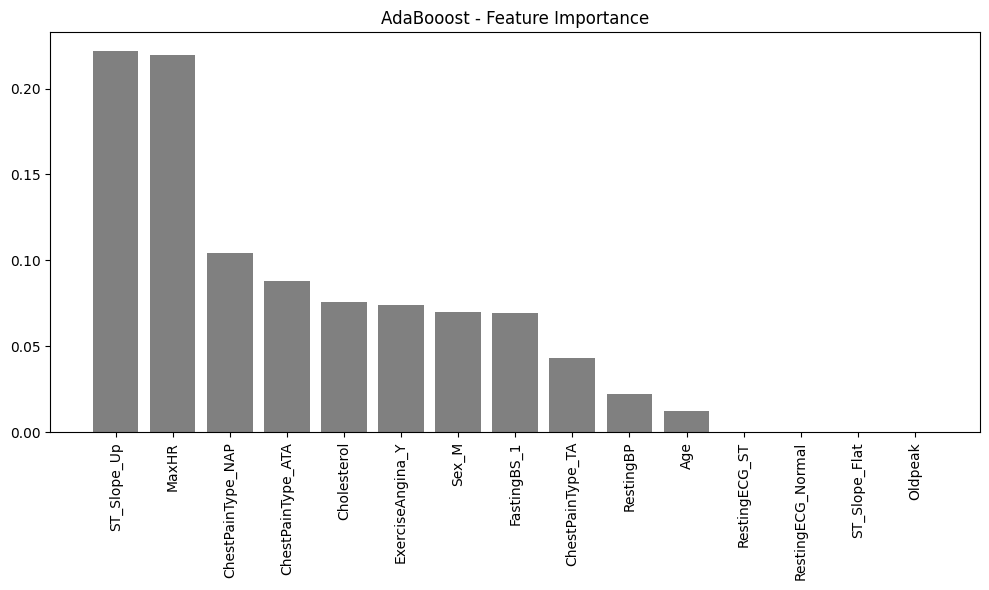

In [ ]:
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices], color='gray')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.title(f"{model_name} - Feature Importance")
    plt.tight_layout()
    plt.show()
plot_feature_importance(models["DecisionTree"], X.columns, "DecisionTree")
plot_feature_importance(models["RandomForest"], X.columns, "RandomForest")
plot_feature_importance(models["ExtraTrees"], X.columns, "ExtraTrees")
plot_feature_importance(models["AdaBoost"], X.columns, "AdaBooost")

**Interactive Heart Disease Prediction**

This section lets you manually enter patient health data and select one of the trained models to predict the likelihood of heart disease. The model will return a diagnosis along with the prediction probability.

In [ ]:
def get_user_input():
    print("\nEnter the following values for heart disease prediction:")
    valid_sex = {'M', 'F'}
    valid_chest_pain = {'TA', 'NAP', 'ATA', 'ASY'}
    valid_fasting_bs = {0, 1}
    valid_resting_ecg = {'NORMAL', 'ST', 'LVH'}
    valid_exercise_angina = {'Y', 'N'}
    valid_st_slope = {'UP', 'FLAT', 'DOWN'}
    try:
        Age = int(input("Age: "))
        Sex = input("Sex (M/F): ").strip().upper()
        if Sex not in valid_sex:
            raise ValueError("Sex must be 'M' or 'F'")
        ChestPainType = input("Chest Pain Type (TA/NAP/ATA/ASY): ").strip().upper()
        if ChestPainType not in valid_chest_pain:
            raise ValueError("Invalid Chest Pain Type. Choose from TA, NAP, ATA, ASY")
        RestingBP = float(input("Resting Blood Pressure: "))
        Cholesterol = float(input("Cholesterol: "))
        FastingBS = int(input("Fasting Blood Sugar > 120 mg/dl (0 = False, 1 = True): "))
        if FastingBS not in valid_fasting_bs:
            raise ValueError("Fasting Blood Sugar must be 0 or 1")
        RestingECG = input("Resting ECG (Normal/ST/LVH): ").strip().upper()
        if RestingECG not in valid_resting_ecg:
            raise ValueError("Invalid Resting ECG. Choose from Normal, ST, LVH")
        MaxHR = int(input("Max Heart Rate: "))
        ExerciseAngina = input("Exercise Angina (Y/N): ").strip().upper()
        if ExerciseAngina not in valid_exercise_angina:
            raise ValueError("Exercise Angina must be 'Y' or 'N'")
        Oldpeak = float(input("Oldpeak (ST depression induced by exercise): "))
        ST_Slope = input("ST Slope (Up/Flat/Down): ").strip().upper()
        if ST_Slope not in valid_st_slope:
            raise ValueError("Invalid ST Slope. Choose from Up, Flat, Down")
    except ValueError as e:
        print(f"Invalid input: {e}")
        return None
    user_df = pd.DataFrame([{
        'Age': Age,
        'Sex': Sex,
        'ChestPainType': ChestPainType,
        'RestingBP': RestingBP,
        'Cholesterol': Cholesterol,
        'FastingBS': FastingBS,
        'RestingECG': RestingECG,
        'MaxHR': MaxHR,
        'ExerciseAngina': ExerciseAngina,
        'Oldpeak': Oldpeak,
        'ST_Slope': ST_Slope
    }])
    return user_df
def choose_model():
    print("\nChoose the model for prediction:")
    print("1. Decision Tree")
    print("2. Random Forest")
    print("3. Extra Trees")
    print("4. AdaBoost")
    choice = input("Enter the number corresponding to the model: ").strip()
    if choice == "1":
        return models["DecisionTree"]
    elif choice == "2":
        return models["RandomForest"]
    elif choice == "3":
        return models["ExtraTrees"]
    elif choice == "4":
        return models["AdaBoost"]
    else:
        print("Invalid choice. Defaulting to Random Forest.")
        return models["RandomForest"]
user_data = get_user_input()
if user_data is not None:
    selected_model = choose_model()
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    user_encoded = pd.get_dummies(user_data, columns=categorical_cols, drop_first=True)
    user_encoded = user_encoded.reindex(columns=X.columns, fill_value=0)
    user_scaled = scaler.transform(user_encoded)
    prediction = selected_model.predict(user_scaled)[0]
    probability = selected_model.predict_proba(user_scaled)[0][1]
    print("\nPrediction Result:")
    if prediction == 1:
        print(f"The person is likely to have HEART DISEASE with probability {probability:.2f}")
    else:
        print(f"The person is likely to be HEALTHY with probability {1 - probability:.2f}")


Enter the following values for heart disease prediction:
Age: 35
Sex (M/F): M
Chest Pain Type (TA/NAP/ATA/ASY): TA
Resting Blood Pressure: 150
Cholesterol: 175
Fasting Blood Sugar > 120 mg/dl (0 = False, 1 = True): 1
Resting ECG (Normal/ST/LVH): ST
Max Heart Rate: 99
Exercise Angina (Y/N): Y
Oldpeak (ST depression induced by exercise): 2
ST Slope (Up/Flat/Down): Flat

Choose the model for prediction:
1. Decision Tree
2. Random Forest
3. Extra Trees
4. AdaBoost
Enter the number corresponding to the model: 3

Prediction Result:
The person is likely to have HEART DISEASE with probability 0.60


**Check Current Working Directory**

Before saving models with pickle, it’s useful to verify the current working directory.

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1IndIZAt_ugZxAyzMrxzilns8pZg_cTg5/MCA_Major_Project_ML/MultipleDiseasePrediction/Datasets/Heart'

**Saving Models with Pickle**

Finally, we save each trained model from the models_smote dictionary into .pkl files. These models can later be loaded into a Flask application for making predictions based on user input.

In [ ]:
import pickle
for model_name, model in models.items():
    model_file = f"heart_{model_name}_model.pkl"
    with open(model_file, 'wb') as f:
      pickle.dump(model, f)
    print(f"Saved model: {model_file}")

Saved model: heart_DecisionTree_model.pkl
Saved model: heart_RandomForest_model.pkl
Saved model: heart_ExtraTrees_model.pkl
Saved model: heart_AdaBoost_model.pkl


**Saving Processed Heart Disease Dataset**

We export the preprocessed heart disease dataset to a CSV file named heart_processed.csv without including the index column.

In [ ]:
df_heart.to_csv('heart_processed.csv', index=False)